In [750]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [751]:
Bayut_df = pd.read_csv('bayut/bayut_properties.csv')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [752]:
Bayut_df.head()

,Page,Price,Type,Beds,Baths,Area,Location
0,2,"680,000",Apartment,6.0,4.0,230 Sq. M.,"Al Rayaan, North Jeddah, Jeddah"
1,2,"450,000",Apartment,4.0,4.0,900 Sq. M.,"Al Safa, North Jeddah, Jeddah"
2,2,"450,000",Apartment,4.0,3.0,136 Sq. M.,"Bryman, North Jeddah, Jeddah"
3,2,"580,000",Apartment,4.0,3.0,134 Sq. M.,"Al Manar, North Jeddah, Jeddah"
4,2,"670,000",Apartment,5.0,3.0,162 Sq. M.,"Al Nuzhah, North Jeddah, Jeddah"


In [753]:
Bayut_df.dtypes

Page          int64
Price        object
Type         object
Beds        float64
Baths       float64
Area         object
Location     object
dtype: object

In [754]:
Bayut_df.shape

(17448, 7)

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [755]:
Bayut_df

,Page,Price,Type,Beds,Baths,Area,Location
0,2,"680,000",Apartment,6.0,4.0,230 Sq. M.,"Al Rayaan, North Jeddah, Jeddah"
1,2,"450,000",Apartment,4.0,4.0,900 Sq. M.,"Al Safa, North Jeddah, Jeddah"
2,2,"450,000",Apartment,4.0,3.0,136 Sq. M.,"Bryman, North Jeddah, Jeddah"
3,2,"580,000",Apartment,4.0,3.0,134 Sq. M.,"Al Manar, North Jeddah, Jeddah"
4,2,"670,000",Apartment,5.0,3.0,162 Sq. M.,"Al Nuzhah, North Jeddah, Jeddah"
...,...,...,...,...,...,...,...
17443,699,"1,450,000",Villa,6.0,7.0,301 Sq. M.,"Al Zumorrud, North Jeddah, Jeddah"
17444,699,"880,000",Floor,6.0,3.0,315 Sq. M.,"Al Khadraa, Madina"
17445,699,"1,200,000",Villa,7.0,7.0,300 Sq. M.,"Ash Shamiya Al Jadid, Makkah"
17446,699,"390,000",Apartment,3.0,3.0,110 Sq. M.,"Umm Hablain Al Gharbia, Jeddah"


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [756]:
Bayut_df.drop(columns=['Page'], inplace=True)

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [757]:
Bayut_df.duplicated().sum()

4894

In [758]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [759]:
miss=Bayut_df[Bayut_df['Area'].isnull()]
miss['Type'].value_counts()

Series([], Name: count, dtype: int64)

In [760]:
#Display number missing values per column
Bayut_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17448 entries, 0 to 17447
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     17448 non-null  object 
 1   Type      17448 non-null  object 
 2   Beds      15269 non-null  float64
 3   Baths     15011 non-null  float64
 4   Area      17448 non-null  object 
 5   Location  17448 non-null  object 
dtypes: float64(2), object(4)
memory usage: 818.0+ KB


In [761]:
Bayut_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17448 entries, 0 to 17447
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     17448 non-null  object 
 1   Type      17448 non-null  object 
 2   Beds      15269 non-null  float64
 3   Baths     15011 non-null  float64
 4   Area      17448 non-null  object 
 5   Location  17448 non-null  object 
dtypes: float64(2), object(4)
memory usage: 818.0+ KB


In [762]:
Bayut_df['Type'].value_counts()

Type
Apartment               8172
Villa                   5187
Residential Land        1713
Floor                   1691
Residential Building     223
Land                     195
Building                 182
Rest House                85
Name: count, dtype: int64

In [763]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [764]:
Bayut_df.dtypes

Price        object
Type         object
Beds        float64
Baths       float64
Area         object
Location     object
dtype: object

In [765]:
# go to clean them 

In [766]:
# check outliers 

In [767]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

In [768]:
indexs=Bayut_df[Bayut_df['Area'].isnull()].index
Bayut_df.drop(indexs,inplace=True)

In [769]:
Bayut_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17448 entries, 0 to 17447
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     17448 non-null  object 
 1   Type      17448 non-null  object 
 2   Beds      15269 non-null  float64
 3   Baths     15011 non-null  float64
 4   Area      17448 non-null  object 
 5   Location  17448 non-null  object 
dtypes: float64(2), object(4)
memory usage: 818.0+ KB


In [770]:
# check columns types 
Bayut_df.dtypes

Price        object
Type         object
Beds        float64
Baths       float64
Area         object
Location     object
dtype: object

In [771]:
Bayut_df["Area"].value_counts()

Area
300 Sq. M.        469
200 Sq. M.        349
450 Sq. M.        298
600 Sq. M.        292
400 Sq. M.        280
                 ... 
198,450 Sq. M.      1
113,750 Sq. M.      1
1,910 Sq. M.        1
1,350 Sq. M.        1
2,476 Sq. M.        1
Name: count, Length: 1086, dtype: int64

In [772]:
Bayut_df["Area"][0].split(" ")[0]

'230'

In [773]:
Bayut_df["Area"]=Bayut_df["Area"].apply(lambda x: x.split(" ")[0])

In [774]:
Bayut_df['Area'] = Bayut_df['Area'].str.replace(',', '').astype(int)

In [775]:
Bayut_df["Area"].value_counts()

Area
300       469
200       349
450       298
600       292
400       280
         ... 
198450      1
113750      1
1910        1
1350        1
2476        1
Name: count, Length: 1086, dtype: int64

In [776]:
Bayut_df.dtypes

Price        object
Type         object
Beds        float64
Baths       float64
Area          int64
Location     object
dtype: object

In [777]:
Bayut_df['Area'].isnull().sum()

0

In [778]:
Bayut_df.loc[(Bayut_df['Type'] == 'Residential Land') | (Bayut_df['Type'] == 'Land'), 'Beds'] = Bayut_df.loc[(Bayut_df['Type'] == 'Residential Land') | (Bayut_df['Type'] == 'Land'), 'Beds'].fillna(0)


In [779]:
Bayut_df[Bayut_df["Beds"].isnull()]["Type"].value_counts()

Type
Building                170
Residential Building     91
Apartment                17
Rest House                4
Floor                     1
Name: count, dtype: int64

In [780]:
Bayut_df.loc[(Bayut_df['Type'] == 'Residential Land') | (Bayut_df['Type'] == 'Land'), 'Baths'] = Bayut_df.loc[(Bayut_df['Type'] == 'Residential Land') | (Bayut_df['Type'] == 'Land'), 'Baths'].fillna(0)


In [781]:
Bayut_df[Bayut_df["Baths"].isnull()]["Type"].value_counts()

Type
Building                169
Villa                   154
Apartment               119
Residential Building     97
Rest House                4
Name: count, dtype: int64

In [782]:
df_sorted = Bayut_df.sort_values("Area")
df_sorted

,Price,Type,Beds,Baths,Area,Location
16776,"500,000",Residential Building,NaN,NaN,15,"Manfouhah Al Jadidah, Central Riyadh, Riyadh"
2383,"750,000",Apartment,1.0,1.0,44,"Wadi Jalil, Makkah"
737,"1,250,000",Floor,4.0,5.0,44,"Al Rimal, East Riyadh, Riyadh"
13841,"1,100,000",Apartment,6.0,4.0,44,"Al Rimal, East Riyadh, Riyadh"
1206,"1,250,000",Floor,5.0,5.0,44,"Al Rimal, East Riyadh, Riyadh"
...,...,...,...,...,...,...
6915,"1,000,000",Land,0.0,0.0,113750,Mulayjah
8695,"1,500,760",Residential Land,0.0,0.0,116731,"Shuran, Madina"
6916,"1,200,000",Land,0.0,0.0,198450,Mulayjah
4443,"141,894,115",Land,0.0,0.0,283788,"Al Birriyyah, South Riyadh, Riyadh"


In [783]:
# Define the property types that need filling
property_types_to_fill = ["Building", "Villa", "Apartment", "Residential Building", "Rest House","Floor"]

# Sorting by Area within each property type
df_sorted = Bayut_df[Bayut_df['Type'].isin(property_types_to_fill)].sort_values(by="Area")

# Filling only null values using backward fill
Bayut_df.loc[Bayut_df['Type'].isin(property_types_to_fill), 'Beds'] = (
    df_sorted['Beds'].bfill()
)

Bayut_df.loc[Bayut_df['Type'].isin(property_types_to_fill), 'Baths'] = (
    df_sorted['Baths'].bfill()
)


In [784]:
Bayut_df[Bayut_df["Beds"].isnull()]["Type"].value_counts()

Series([], Name: count, dtype: int64)

### Correcting errors

-------------------

In [785]:
Bayut_df.dtypes

Price        object
Type         object
Beds        float64
Baths       float64
Area          int64
Location     object
dtype: object

In [786]:
Bayut_df["Price"] = Bayut_df["Price"].str.replace(',', '').astype(float)

In [787]:
Bayut_df.dtypes

Price       float64
Type         object
Beds        float64
Baths       float64
Area          int64
Location     object
dtype: object

In [788]:
Bayut_df["Beds"]=Bayut_df["Beds"].astype(int)
Bayut_df["Baths"]=Bayut_df["Baths"].astype(int)

In [789]:
Bayut_df.dtypes

Price       float64
Type         object
Beds          int64
Baths         int64
Area          int64
Location     object
dtype: object

In [790]:
Bayut_df["City"]=Bayut_df["Location"].apply(lambda x: x.split(",")[-1].strip())

In [791]:
Bayut_df["Neighborhood"]=Bayut_df["Location"].apply(lambda x: x.split(",")[0].strip())

In [792]:
Bayut_df.rename(columns={"Area":"Area m2"},inplace=True)

In [793]:
Bayut_df

,Price,Type,Beds,Baths,Area m2,Location,City,Neighborhood
0,680000.0,Apartment,6,4,230,"Al Rayaan, North Jeddah, Jeddah",Jeddah,Al Rayaan
1,450000.0,Apartment,4,4,900,"Al Safa, North Jeddah, Jeddah",Jeddah,Al Safa
2,450000.0,Apartment,4,3,136,"Bryman, North Jeddah, Jeddah",Jeddah,Bryman
3,580000.0,Apartment,4,3,134,"Al Manar, North Jeddah, Jeddah",Jeddah,Al Manar
4,670000.0,Apartment,5,3,162,"Al Nuzhah, North Jeddah, Jeddah",Jeddah,Al Nuzhah
...,...,...,...,...,...,...,...,...
17443,1450000.0,Villa,6,7,301,"Al Zumorrud, North Jeddah, Jeddah",Jeddah,Al Zumorrud
17444,880000.0,Floor,6,3,315,"Al Khadraa, Madina",Madina,Al Khadraa
17445,1200000.0,Villa,7,7,300,"Ash Shamiya Al Jadid, Makkah",Makkah,Ash Shamiya Al Jadid
17446,390000.0,Apartment,3,3,110,"Umm Hablain Al Gharbia, Jeddah",Jeddah,Umm Hablain Al Gharbia


In [794]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


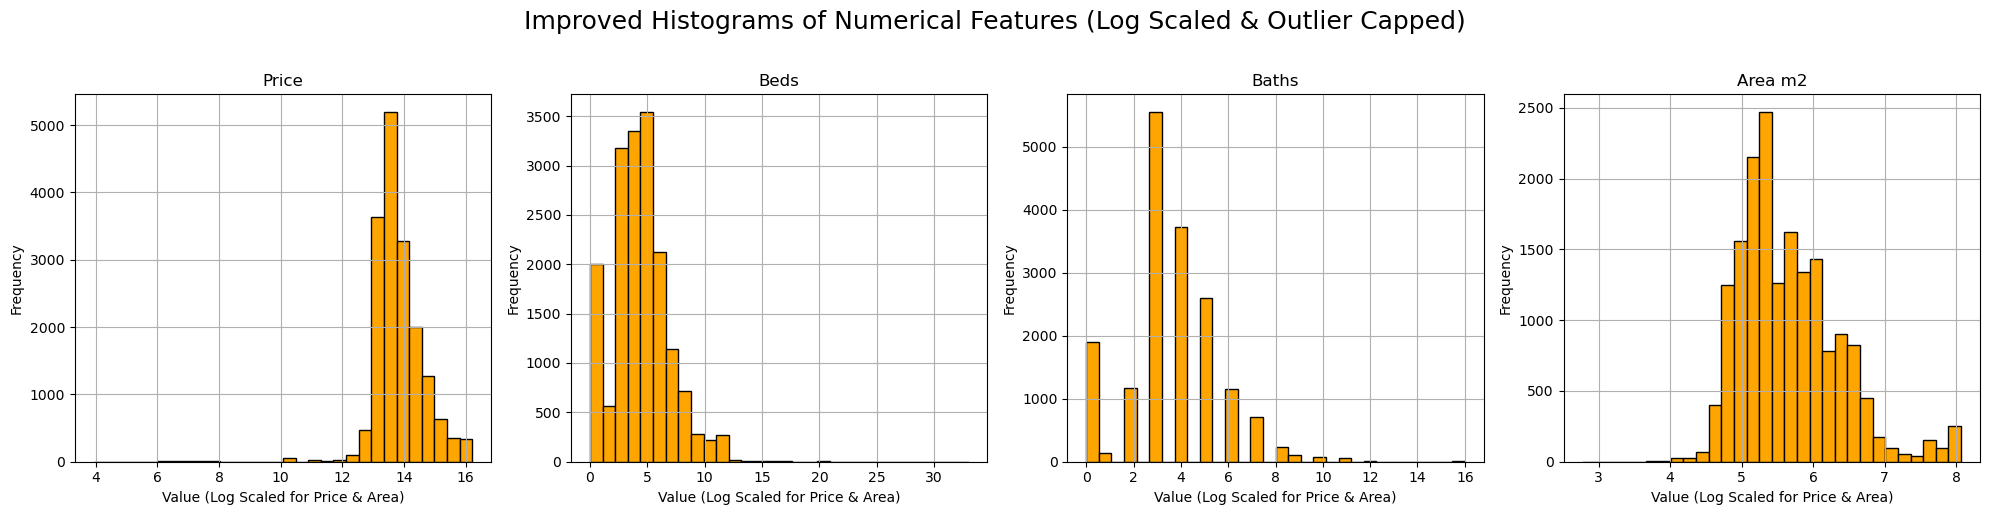

In [795]:
import numpy as np
import matplotlib.pyplot as plt

# Copy DataFrame to avoid modifying the original
Bayut_df_viz = Bayut_df.copy()

# Convert to numeric, handling errors
for col in ['Price', 'Area m2']:  # Adjust column names as needed
    if col in Bayut_df_viz.columns:
        Bayut_df_viz[col] = pd.to_numeric(Bayut_df_viz[col], errors='coerce')
        
        # Remove extreme outliers (capping at 99th percentile)
        upper_limit = Bayut_df_viz[col].quantile(0.99)
        Bayut_df_viz[col] = np.where(Bayut_df_viz[col] > upper_limit, upper_limit, Bayut_df_viz[col])
        
        # Apply log transformation (log(1 + x))
        Bayut_df_viz[col] = np.log1p(Bayut_df_viz[col])

# Select numerical columns
numerical_cols = Bayut_df_viz.select_dtypes(include=['number']).columns

# Define number of rows and columns for subplots
n_cols = 4  # Number of columns per row
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # Auto-adjust rows

# Set figure size for better readability
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()  # Flatten in case of a single row

# Plot histograms for each numerical column
for i, col in enumerate(numerical_cols):
    Bayut_df_viz[col].hist(ax=axes[i], bins=30, edgecolor='black', color='orange')
    axes[i].set_title(col)
    axes[i].set_xlabel("Value (Log Scaled for Price & Area)")
    axes[i].set_ylabel("Frequency")

# Remove extra subplots (if any)
for i in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[i])

# Set title for the entire figure
fig.suptitle('Improved Histograms of Numerical Features (Log Scaled & Outlier Capped)', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()


In [796]:
zscore(Bayut_df['Price'])
#Calculate the z-score for each data point in the 'Price' column
Bayut_df['Price_z_score'] = zscore(Bayut_df['Price'])

#Filter the DataFrame to remove outliers
Bayut_df[(Bayut_df['Price_z_score'] > 3) | (Bayut_df['Price_z_score']< -3)].sort_values(by='Price')

,Price,Type,Beds,Baths,Area m2,Location,City,Neighborhood,Price_z_score
2203,8.281000e+08,Residential Land,0,0,455,"Al Mahdiyah, West Riyadh, Riyadh",Riyadh,Al Mahdiyah,3.447604
672,1.160000e+09,Land,0,0,725,"Al Zumorrud, North Jeddah, Jeddah",Jeddah,Al Zumorrud,4.840284
7801,1.200000e+09,Residential Land,0,0,600,"Al Zohour District, Al Quwaiiyah",Al Quwaiiyah,Al Zohour District,5.008127
8323,1.350210e+09,Land,0,0,450,"Al Mahdiyah, West Riyadh, Riyadh",Riyadh,Al Mahdiyah,5.638421
3537,1.352400e+09,Residential Land,0,0,735,"Al Kair District, North Riyadh, Riyadh",Riyadh,Al Kair District,5.647611
3518,1.402500e+09,Land,0,0,750,Riyadh,Riyadh,Riyadh,5.857834
7902,1.536000e+09,Residential Land,0,0,1280,"Al Faysaliyah, Al Kharj Riyadh Region",Al Kharj Riyadh Region,Al Faysaliyah,6.418012
1864,1.800000e+09,Residential Land,0,0,900,"Al Shifa, South Riyadh, Riyadh",Riyadh,Al Shifa,7.525778
797,2.080000e+09,Land,0,0,800,"Al Lulu, North Jeddah, Jeddah",Jeddah,Al Lulu,8.700681
795,2.080000e+09,Land,0,0,800,"Al Lulu, North Jeddah, Jeddah",Jeddah,Al Lulu,8.700681


In [797]:
Bayut_df.shape

(17448, 9)

In [798]:
# Calculate the Z-score for the 'Price' column
Bayut_df['Price_z_score'] = zscore(Bayut_df['Price'])

# Remove rows where the Z-score is > 3 or < -3
Bayut_df = Bayut_df[(Bayut_df['Price_z_score'] <= 3) & (Bayut_df['Price_z_score'] >= -3)]

# Drop the 'Price_z_score' column if no longer needed
Bayut_df.drop(columns=['Price_z_score'], inplace=True)

In [799]:
zscore(Bayut_df['Area m2'])
#Calculate the z-score for each data point in the 'Price' column
Bayut_df['Area_z_score'] = zscore(Bayut_df['Area m2'])

#Filter the DataFrame to remove outliers
Bayut_df[(Bayut_df['Area_z_score'] > 3) | (Bayut_df['Area_z_score']< -3)].sort_values(by='Area m2')

,Price,Type,Beds,Baths,Area m2,Location,City,Neighborhood,Area_z_score
1552,52500000.0,Land,0,0,15000,"Al Rimal, East Riyadh, Riyadh",Riyadh,Al Rimal,3.050631
2848,32120340.0,Residential Land,0,0,16060,"Salam, Al Jubaylah",Al Jubaylah,Salam,3.273886
7748,44145054.0,Residential Land,0,0,16350,"Al Shulah, Dammam",Dammam,Al Shulah,3.334965
7747,44145054.0,Residential Land,0,0,16350,"Al Shulah, Dammam",Dammam,Al Shulah,3.334965
977,1990000.0,Floor,3,2,16843,"Al Arid, North Riyadh, Riyadh",Riyadh,Al Arid,3.438799
770,549000.0,Apartment,3,3,16975,"Umm Hablain Al Gharbia, Jeddah",Jeddah,Umm Hablain Al Gharbia,3.466601
12099,549000.0,Apartment,3,3,16975,"Umm Hablain Al Gharbia, Jeddah",Jeddah,Umm Hablain Al Gharbia,3.466601
11986,629000.0,Apartment,3,2,18490,"Al Rimal, East Riyadh, Riyadh",Riyadh,Al Rimal,3.785686
5436,717000.0,Apartment,3,3,18490,"Al Rimal, East Riyadh, Riyadh",Riyadh,Al Rimal,3.785686
5631,717000.0,Apartment,3,3,18490,"Al Rimal, East Riyadh, Riyadh",Riyadh,Al Rimal,3.785686


In [800]:
# Calculate the Z-score for the 'Area m2' column
Bayut_df['Area_z_score'] = zscore(Bayut_df['Area m2'])

# Remove rows where the Z-score is > 3 or < -3
Bayut_df = Bayut_df[(Bayut_df['Area_z_score'] <= 0.5) & (Bayut_df['Area_z_score'] >= -3)]

# Drop the 'Area_z_score' column if no longer needed
Bayut_df.drop(columns=['Area_z_score'], inplace=True)


In [801]:
# Calculate the Z-score for the 'Price' column
Bayut_df['Price_z_score'] = zscore(Bayut_df['Price'])

# Remove rows where the Z-score is > 3 or < -3
Bayut_df = Bayut_df[(Bayut_df['Price_z_score'] <= 2.5) & (Bayut_df['Price_z_score'] >= -2.5)]

# Drop the 'Price_z_score' column if no longer needed
Bayut_df.drop(columns=['Price_z_score'], inplace=True)

In [802]:
Bayut_df.shape

(17153, 8)

In [803]:
Bayut_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,17153.0,1.380480e+06,1.723349e+06,50.0,625000.0,850000.0,1450000.0,35000000.0
Beds,17153.0,4.449892e+00,2.461257e+00,0.0,3.0,4.0,6.0,33.0
Baths,17153.0,3.659535e+00,1.945828e+00,0.0,3.0,4.0,5.0,16.0
Area m2,17153.0,3.543602e+02,3.241497e+02,15.0,170.0,247.0,417.0,2844.0


In [804]:
Bayut_df['Price'].sort_values()

4781           50.0
11134         400.0
12235         400.0
11689         412.0
1506          460.0
            ...    
16184    30000000.0
16589    31000000.0
1406     32800000.0
14459    33000000.0
14468    35000000.0
Name: Price, Length: 17153, dtype: float64

## 3. Univariate Analysis: 

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

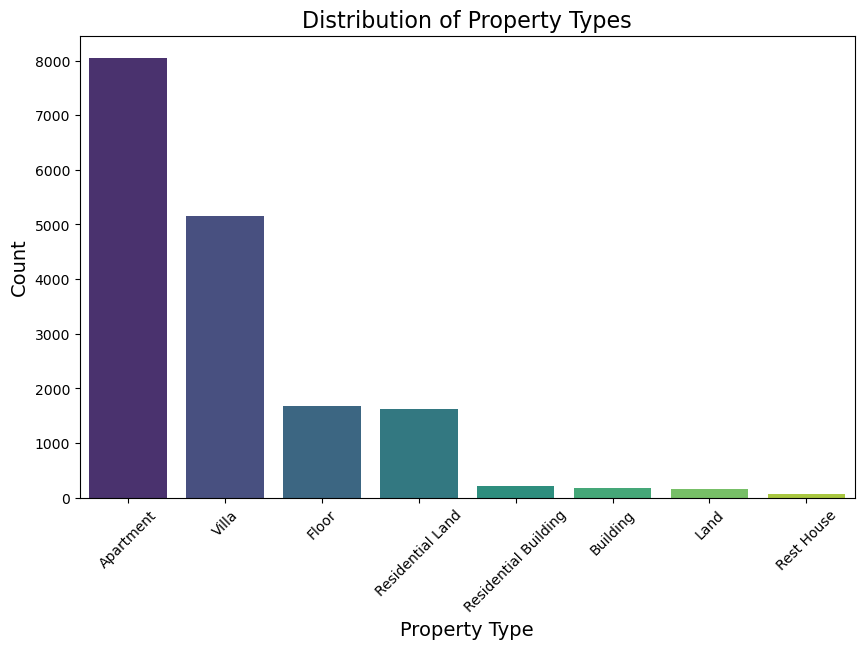

In [805]:
# Count the occurrences of each property type
type_counts = Bayut_df['Type'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')

# Adding labels and title
plt.title('Distribution of Property Types', fontsize=16)
plt.xlabel('Property Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)  # Rotate the x-axis labels if needed for better readability

# Show the plot
plt.show()

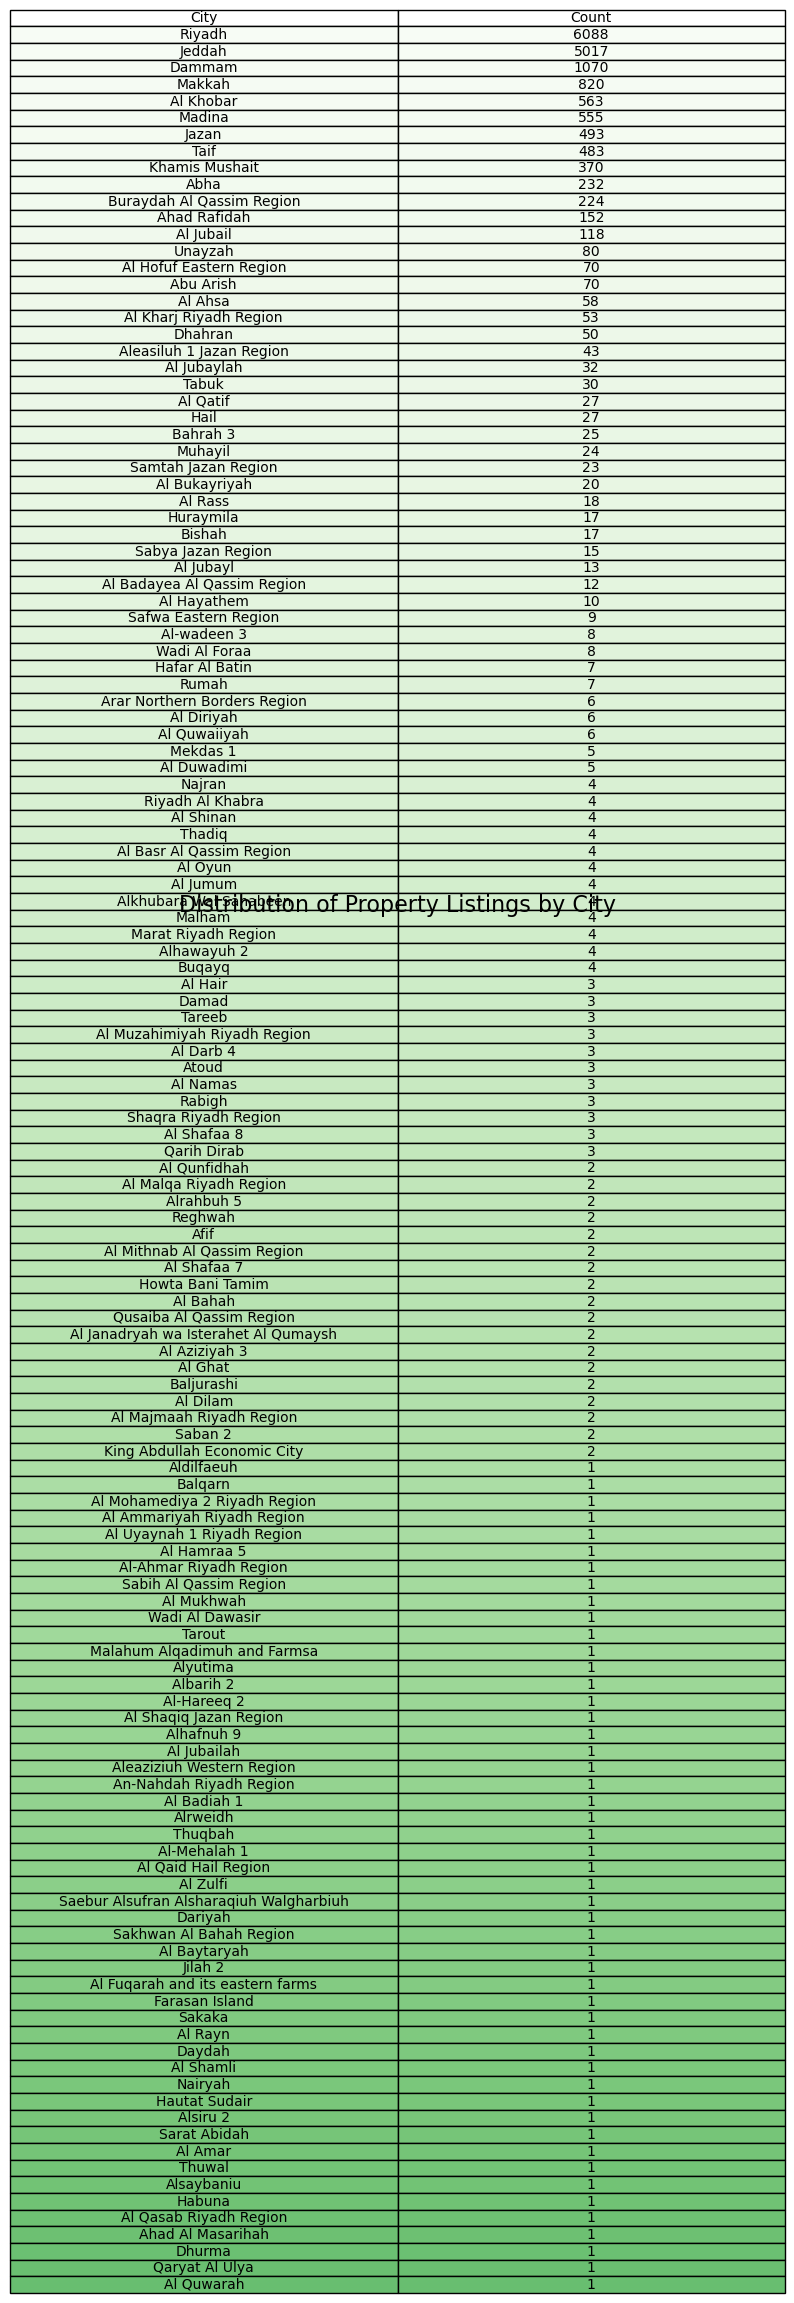

In [806]:


# Assuming df contains a 'City' column
city_counts = Bayut_df['City'].value_counts().reset_index()
city_counts.columns = ['City', 'Count']

# Creating a figure and axis to plot the table
fig, ax = plt.subplots(figsize=(10, 6))

# Hiding the axes
ax.axis('off')

# Generate a list of green colors (one for each row)
colors = plt.cm.Greens(range(len(city_counts)))

# Apply the colors to each cell in the table
cell_colours = [[colors[i], colors[i]] for i in range(len(city_counts))]

# Plotting the table with green colors
table = ax.table(cellText=city_counts.values, colLabels=city_counts.columns, cellLoc='center', loc='center', 
                cellColours=cell_colours)

# Adding title to the table
plt.title('Distribution of Property Listings by City', fontsize=16)

# Display the table
plt.show()


In [807]:
Bayut_df['City'].value_counts()

City
Riyadh                    6088
Jeddah                    5017
Dammam                    1070
Makkah                     820
Al Khobar                  563
                          ... 
Al Qasab Riyadh Region       1
Ahad Al Masarihah            1
Dhurma                       1
Qaryat Al Ulya               1
Al Quwarah                   1
Name: count, Length: 136, dtype: int64

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

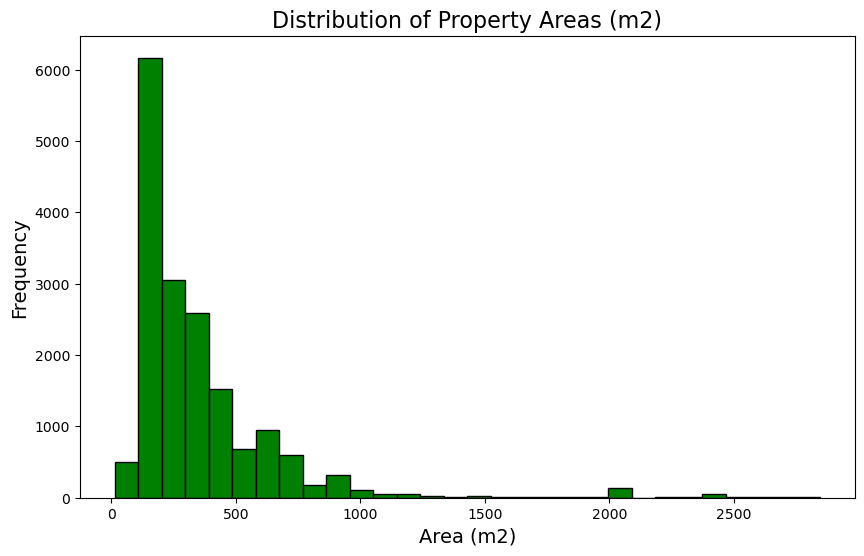

In [808]:
# Plotting the histogram for 'Area m2' column
plt.figure(figsize=(10, 6))
plt.hist(Bayut_df['Area m2'].dropna(), bins=30, color='green', edgecolor='black')

# Adding title and labels
plt.title('Distribution of Property Areas (m2)', fontsize=16)
plt.xlabel('Area (m2)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

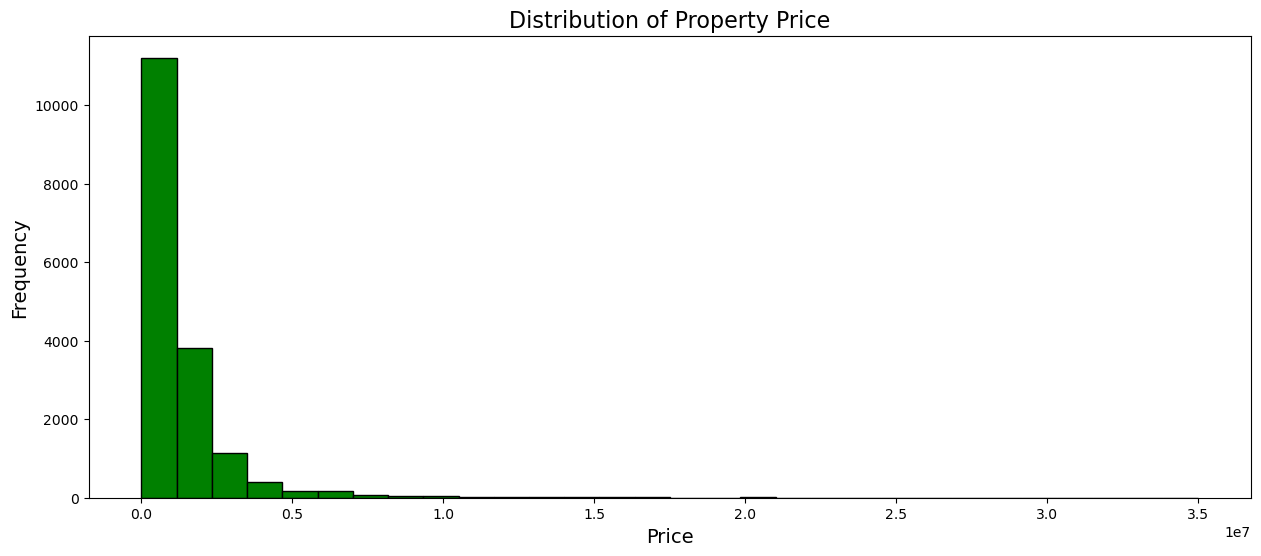

In [809]:
# Plotting the histogram for 'Price' column
plt.figure(figsize=(15, 6))
plt.hist(Bayut_df['Price'].dropna(), bins=30, color='green', edgecolor='black')

# Adding title and labels
plt.title('Distribution of Property Price', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

In [810]:
# Price would be best presented statistically 

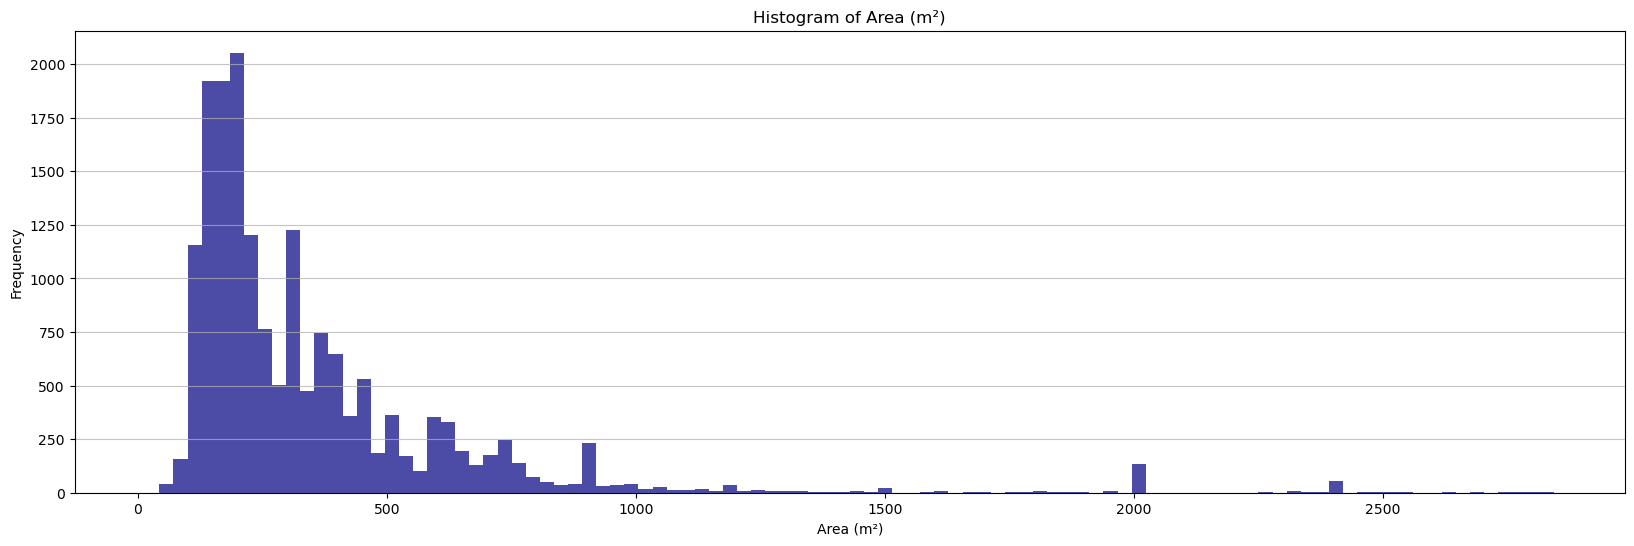

In [811]:
plt.figure(figsize=(20, 6))
plt.hist(Bayut_df['Area m2'], bins=100, color='navy', alpha=0.7)
plt.title('Histogram of Area (m²)')
plt.xlabel('Area (m²)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

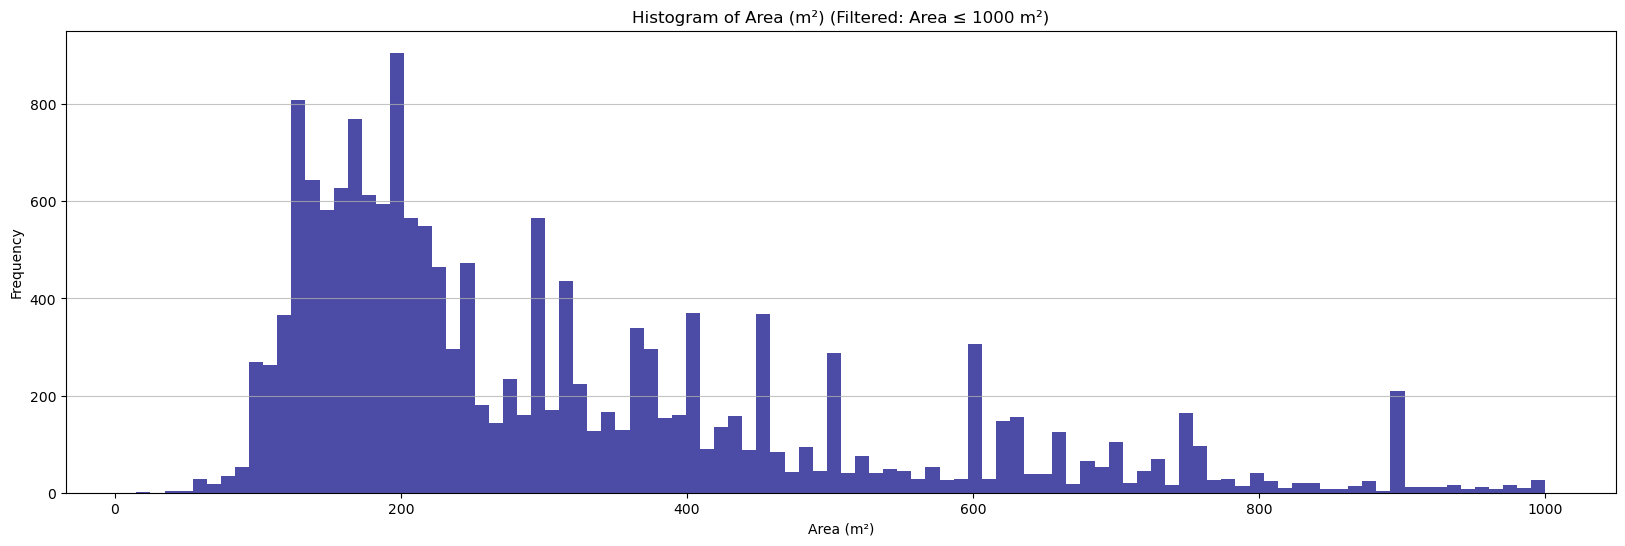

In [812]:
import matplotlib.pyplot as plt

# Filter the DataFrame to include only values where 'Area m2' is <= 1000
filtered_Bayut_df = Bayut_df[Bayut_df['Area m2'] <= 1000]

# Plot histogram
plt.figure(figsize=(20, 6))
plt.hist(filtered_Bayut_df['Area m2'], bins=100, color='navy', alpha=0.7)
plt.title('Histogram of Area (m²) (Filtered: Area ≤ 1000 m²)')
plt.xlabel('Area (m²)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

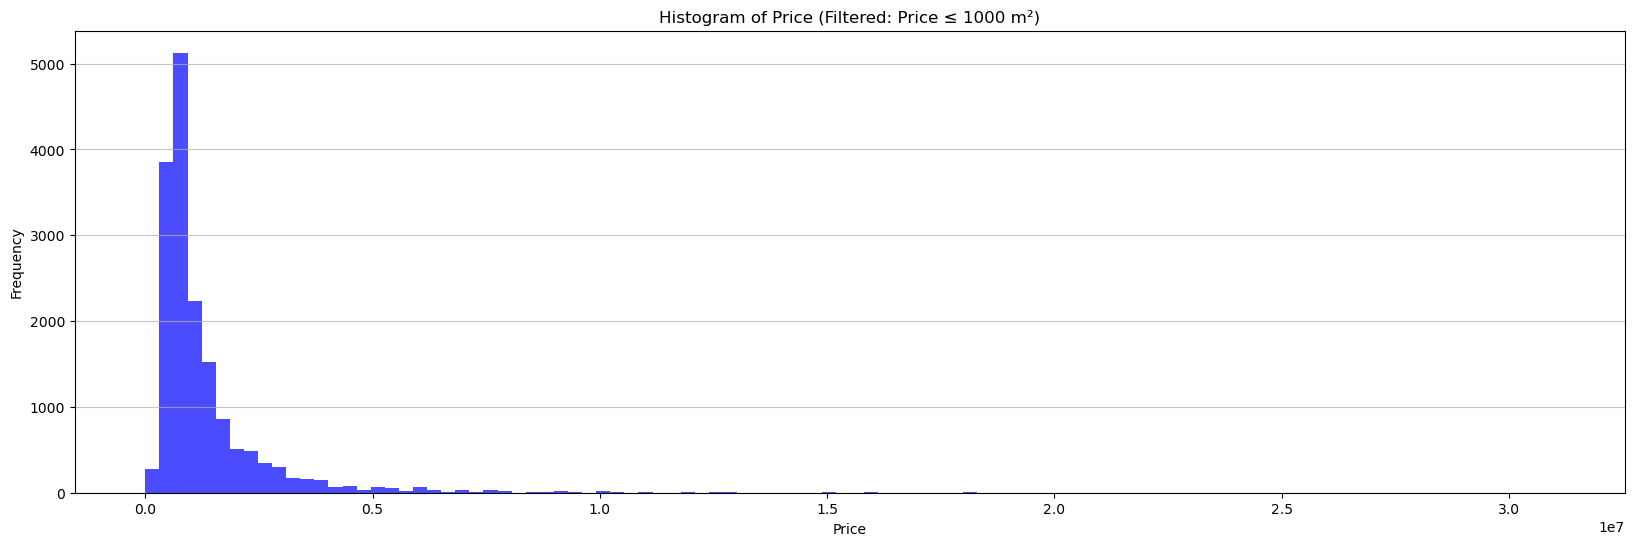

In [813]:
import matplotlib.pyplot as plt

# Filter the DataFrame to include only values where 'Area m2' is <= 1000
filtered_Bayut_df_Price = Bayut_df[Bayut_df['Price'] >= 400000] 

# Plot histogram
plt.figure(figsize=(20, 6))
plt.hist(filtered_Bayut_df['Price'], bins=100, color='blue', alpha=0.7)
plt.title('Histogram of Price (Filtered: Price ≤ 1000 m²)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [814]:
Bayut_df[Bayut_df['Price'] >5000000]


,Price,Type,Beds,Baths,Area m2,Location,City,Neighborhood
36,9000000.0,Building,6,5,600,"Al Munsiyah, East Riyadh, Riyadh",Riyadh,Al Munsiyah
47,7500805.0,Land,0,0,902,"Al Rabwah, Central Riyadh, Riyadh",Riyadh,Al Rabwah
85,6500000.0,Villa,7,8,375,"Al Basateen, North Jeddah, Jeddah",Jeddah,Al Basateen
137,7600000.0,Villa,9,7,1000,"Al Hamra, East Riyadh, Riyadh",Riyadh,Al Hamra
151,6500000.0,Villa,7,7,909,"Al Olaya, North Riyadh, Riyadh",Riyadh,Al Olaya
...,...,...,...,...,...,...,...,...
17171,7000000.0,Rest House,4,4,2520,"Al Rimal, East Riyadh, Riyadh",Riyadh,Al Rimal
17200,8900000.0,Land,0,0,1000,"Al Narjis, North Riyadh, Riyadh",Riyadh,Al Narjis
17211,16000000.0,Land,0,0,1000,"Al Nakhil, North Riyadh, Riyadh",Riyadh,Al Nakhil
17212,8900000.0,Land,0,0,1000,"Al Narjis, North Riyadh, Riyadh",Riyadh,Al Narjis


In [815]:
filtered_Bayut_df.shape

(16630, 8)

In [816]:
Bayut_df = filtered_Bayut_df.copy()

In [817]:
Bayut_df.shape

(16630, 8)

In [818]:
df_filtered = Bayut_df[(Bayut_df['Price'] > 5000000) | (Bayut_df['Price'] >= 400000)].copy()


In [819]:
Bayut_df = df_filtered.copy()

In [820]:
Bayut_df.shape

(16058, 8)

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

In [821]:
Bayut_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,16058.0,1.344146e+06,1.419200e+06,400000.0,650000.0,870000.0,1450000.0,31000000.0
Beds,16058.0,4.576846e+00,2.381261e+00,0.0,3.0,5.0,6.0,33.0
Baths,16058.0,3.756134e+00,1.895065e+00,0.0,3.0,4.0,5.0,16.0
Area m2,16058.0,3.111571e+02,1.924489e+02,15.0,170.0,239.0,400.0,1000.0


## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

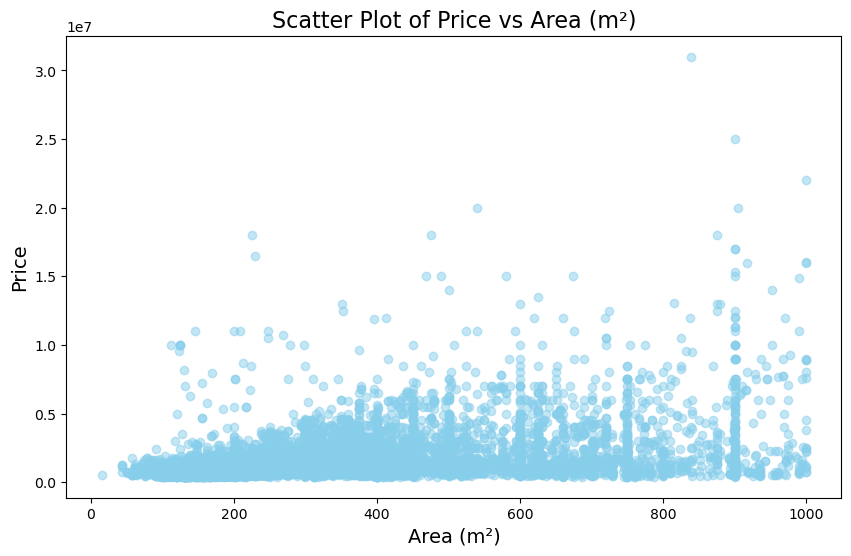

In [822]:
# Scatter plot for Price and Area m2
plt.figure(figsize=(10, 6))
plt.scatter(Bayut_df['Area m2'], Bayut_df['Price'], color='skyblue', alpha=0.5)

# Adding title and labels
plt.title('Scatter Plot of Price vs Area (m²)', fontsize=16)
plt.xlabel('Area (m²)', fontsize=14)
plt.ylabel('Price', fontsize=14)

# Show the plot
plt.show()

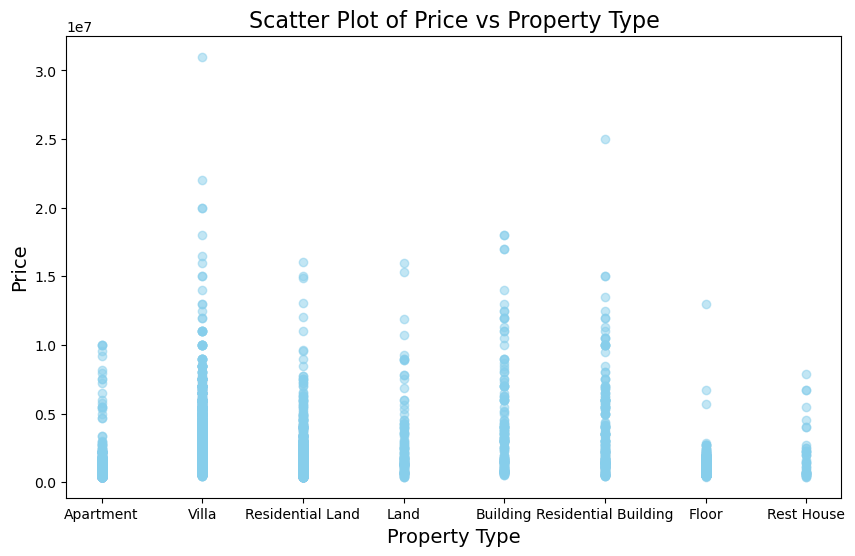

In [823]:
# Scatter plot for 'Type' and 'Price' columns
plt.figure(figsize=(10, 6))
plt.scatter(Bayut_df['Type'], Bayut_df['Price'], color='skyblue', alpha=0.5)

# Adding title and labels
plt.title('Scatter Plot of Price vs Property Type', fontsize=16)
plt.xlabel('Property Type', fontsize=14)
plt.ylabel('Price', fontsize=14)

# Show the plot
plt.show()


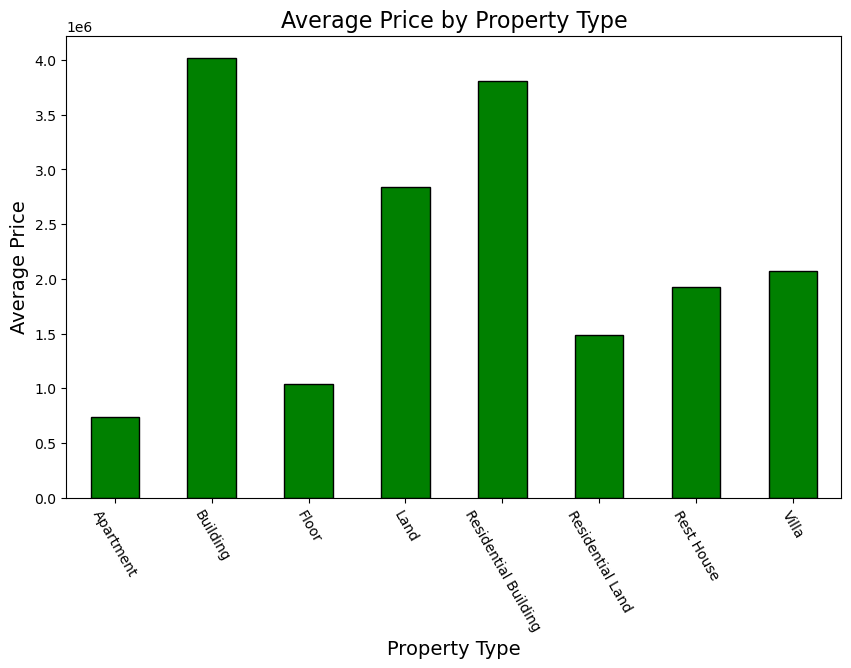

In [824]:
# Calculate the average price for each property type
avg_price_by_type = Bayut_df.groupby('Type')['Price'].mean()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
avg_price_by_type.plot(kind='bar', color='green', edgecolor='black')

# Adding title and labels
plt.title('Average Price by Property Type', fontsize=16)
plt.xlabel('Property Type', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.xticks(rotation=300)

# Show the plot
plt.show()

In [825]:
Bayut_df

,Price,Type,Beds,Baths,Area m2,Location,City,Neighborhood
0,680000.0,Apartment,6,4,230,"Al Rayaan, North Jeddah, Jeddah",Jeddah,Al Rayaan
1,450000.0,Apartment,4,4,900,"Al Safa, North Jeddah, Jeddah",Jeddah,Al Safa
2,450000.0,Apartment,4,3,136,"Bryman, North Jeddah, Jeddah",Jeddah,Bryman
3,580000.0,Apartment,4,3,134,"Al Manar, North Jeddah, Jeddah",Jeddah,Al Manar
4,670000.0,Apartment,5,3,162,"Al Nuzhah, North Jeddah, Jeddah",Jeddah,Al Nuzhah
...,...,...,...,...,...,...,...,...
17442,1200000.0,Villa,7,7,300,"Ash Shamiya Al Jadid, Makkah",Makkah,Ash Shamiya Al Jadid
17443,1450000.0,Villa,6,7,301,"Al Zumorrud, North Jeddah, Jeddah",Jeddah,Al Zumorrud
17444,880000.0,Floor,6,3,315,"Al Khadraa, Madina",Madina,Al Khadraa
17445,1200000.0,Villa,7,7,300,"Ash Shamiya Al Jadid, Makkah",Makkah,Ash Shamiya Al Jadid


In [826]:
Bayut_df.drop(columns=['Price_z_score', 'Area_z_score'], errors='ignore', inplace=True)


In [827]:
Bayut_df["City"].value_counts().head(13)

City
Riyadh                       5853
Jeddah                       4564
Dammam                        992
Makkah                        794
Al Khobar                     544
Madina                        526
Taif                          478
Jazan                         460
Khamis Mushait                368
Abha                          229
Buraydah Al Qassim Region     168
Ahad Rafidah                  147
Al Jubail                     118
Name: count, dtype: int64

## Copy the City's

In [828]:
df_Riyadh=Bayut_df[Bayut_df["City"] == "Riyadh"].copy()
df_Makkah=Bayut_df[Bayut_df["City"] == "Makkah"].copy()
df_Jeddah=Bayut_df[Bayut_df["City"] == "Jeddah"].copy()
df_Dammam=Bayut_df[Bayut_df["City"] == "Dammam"].copy()
df_Khobar=Bayut_df[Bayut_df["City"] == "Al Khobar"].copy()
df_AlJubail=Bayut_df[Bayut_df["City"] == "Al Jubail"].copy()
df_Jazan=Bayut_df[Bayut_df["City"] == "Jazan"].copy()
df_KhamisMushait=Bayut_df[Bayut_df["City"] == "Khamis Mushait"].copy()
df_Abha=Bayut_df[Bayut_df["City"] == "Abha"].copy()
df_AhadRafidah=Bayut_df[Bayut_df["City"] == "Ahad Rafidah"].copy()

In [829]:
df_Jeddah.drop(columns=['City'], errors='ignore', inplace=True)
df_Riyadh.drop(columns=['City'], errors='ignore', inplace=True)
df_Makkah.drop(columns=['City'], errors='ignore', inplace=True)
df_Dammam.drop(columns=['City'], errors='ignore', inplace=True)
df_Khobar.drop(columns=['City'], errors='ignore', inplace=True)
df_Jazan.drop(columns=['City'], errors='ignore', inplace=True)
#df_Taif.drop(columns=['City'], errors='ignore', inplace=True)
df_KhamisMushait.drop(columns=['City'], errors='ignore', inplace=True)
df_Abha.drop(columns=['City'], errors='ignore', inplace=True)
df_AhadRafidah.drop(columns=['City'], errors='ignore', inplace=True)
df_AlJubail.drop(columns=['City'], errors='ignore', inplace=True)



In [830]:
df_southern_region = pd.concat([df_Jazan, df_KhamisMushait, df_Abha, df_AhadRafidah], ignore_index=True)
df_western_region = pd.concat([df_Makkah, df_Jeddah], ignore_index=True)
df_eastern_region = pd.concat([df_Dammam, df_Khobar, df_AlJubail], ignore_index=True)

In [831]:
df_Riyadh.shape,df_eastern_region.shape,df_western_region.shape,df_southern_region.shape

((5853, 7), (1654, 7), (5358, 7), (1204, 7))

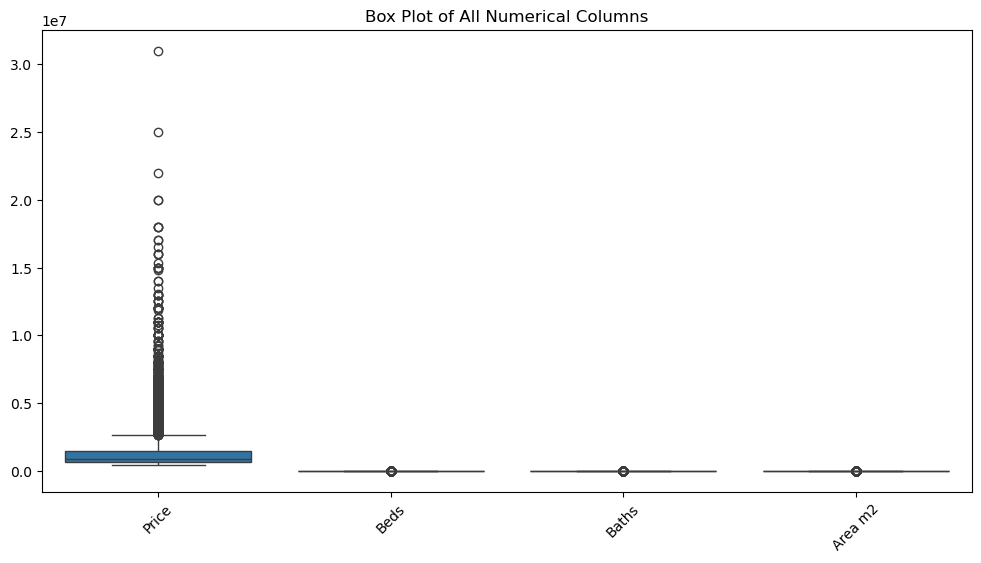

In [832]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=Bayut_df)
plt.xticks(rotation=45)  # Rotate column names if needed
plt.title("Box Plot of All Numerical Columns")
plt.show()

#### 2. Feature engineering

# Riyadh df

In [833]:
encoder = LabelEncoder()
df_Riyadh['Type_encoding'] = encoder.fit_transform(df_Riyadh['Type'])  
df_Riyadh['Location_encoding'] = encoder.fit_transform(df_Riyadh['Location'])  
df_Riyadh['Neighborhood_encoding'] = encoder.fit_transform(df_Riyadh['Neighborhood'])  

# 0 apartment          # 0    7830
# 7 villa              # 7    5135
# 5 restendil land     # 5    1467
# 1 building           # 1     170
# 3 land               # 3     136
# 2 floor              # 2    1662
# 6 rest houes         # 6      53
# 4 restendil building # 4      94

In [834]:
df_Riyadh

,Price,Type,Beds,Baths,Area m2,Location,Neighborhood,Type_encoding,Location_encoding,Neighborhood_encoding
16,690000.0,Apartment,4,5,159,"Al Janadriyah, East Riyadh, Riyadh",Al Janadriyah,0,21,21
21,937500.0,Residential Land,0,0,312,"Al Zahrah, West Riyadh, Riyadh",Al Zahrah,5,100,100
36,9000000.0,Building,6,5,600,"Al Munsiyah, East Riyadh, Riyadh",Al Munsiyah,1,41,41
37,795000.0,Apartment,4,3,158,"Al Rimal, East Riyadh, Riyadh",Al Rimal,0,72,72
38,2100000.0,Villa,5,5,328,"Al Rimal, East Riyadh, Riyadh",Al Rimal,7,72,72
...,...,...,...,...,...,...,...,...,...,...
17390,730000.0,Apartment,3,3,176,"Al Saadah, East Riyadh, Riyadh",Al Saadah,0,73,73
17397,510000.0,Apartment,3,2,182,"Tuwaiq, West Riyadh, Riyadh",Tuwaiq,0,136,136
17408,800000.0,Floor,3,2,176,"Tuwaiq, West Riyadh, Riyadh",Tuwaiq,2,136,136
17431,750000.0,Floor,3,2,164,"Al Hazm, West Riyadh, Riyadh",Al Hazm,2,19,19


## Building the model Kmeans

In [835]:
# Selecting numerical columns for clustering
#X = Bayut_df.drop(columns=['Type','Location','City','Neighborhood'])  

# 0.3/0.4  
F = ['Type_encoding','Price',"Area m2"]
# 0.4/0.59 F = ['Type_encoding','Location_encoding','City_encoding','Neighborhood_encoding']
#F = ['Type_encoding','Location_encoding','City_encoding','Neighborhood_encoding','Price']
X = df_Riyadh[F]

# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



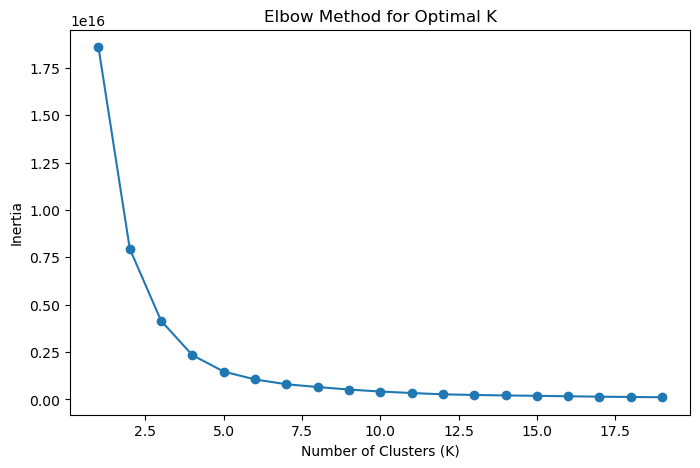

In [836]:
# Finding the optimal number of clusters using the Elbow Method
wcss = []
k_range = range(1, 20)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [837]:
# Optional: Apply k-Means using the optimal number of clusters
optimal_clusters = 3 # This might change based on your actual elbow curve analysis
model = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

## Train and Test the Model

In [838]:
# Fit the model on the training data
y_pred = model.fit_predict(X_scaled)

## Evaluating the Model 

In [839]:
X.head(2)

,Type_encoding,Price,Area m2
16,0,690000.0,159
21,5,937500.0,312


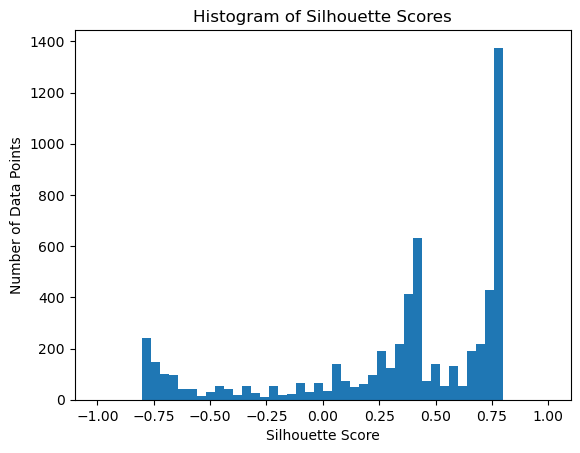

Silhouette average score: 0.33122967481201426


In [840]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Calculate Silhouette scores for each data point
silhouette_scores = silhouette_samples(X, y_pred)

# Calculate Silhouette average score
silhouette_avg = silhouette_score(X, y_pred)

# Plot Silhouette scores
plt.hist(silhouette_scores, bins=50, range=(-1, 1))
plt.title('Histogram of Silhouette Scores')
plt.xlabel('Silhouette Score')
plt.ylabel('Number of Data Points')
plt.show()

print(f'Silhouette average score: {silhouette_avg}')

In [841]:
silhouette_scores

array([ 0.77502235, -0.77432856,  0.56659051, ...,  0.79450112,
        0.78943402,  0.76306437])

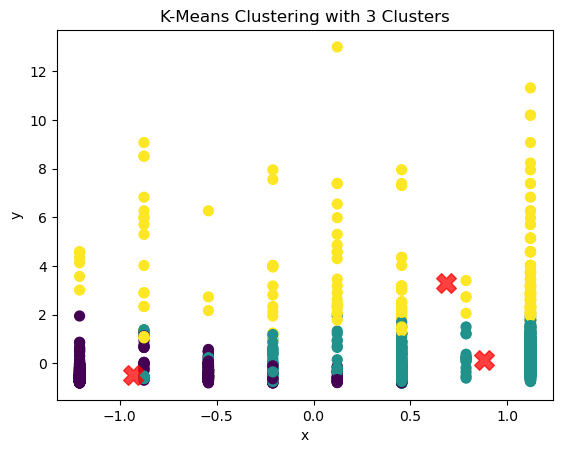

In [842]:
# Plotting the clusters with optimal number
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [843]:
X['kmeans'] = y_pred

In [844]:
X['kmeans'].value_counts()

kmeans
0    2807
1    2762
2     284
Name: count, dtype: int64

In [845]:
X[X["kmeans"]==2]["Type_encoding"].value_counts()

Type_encoding
7    182
5     32
4     22
1     19
3     15
0      7
6      4
2      3
Name: count, dtype: int64

In [846]:
X[X["kmeans"]==2].describe().T

,count,mean,std,min,25%,50%,75%,max
Type_encoding,284.0,5.690141e+00,2.046053e+00,0.0,5.0,7.0,7.0,7.0
Price,284.0,7.709836e+06,3.348485e+06,3499200.0,5618750.0,6700000.0,8500000.0,25000000.0
Area m2,284.0,6.506761e+02,2.168456e+02,123.0,468.0,625.0,899.0,1000.0
kmeans,284.0,2.000000e+00,0.000000e+00,2.0,2.0,2.0,2.0,2.0


In [847]:
X[X["kmeans"]==1].describe().T

,count,mean,std,min,25%,50%,75%,max
Type_encoding,2762.0,6.276249e+00,1.491522e+00,0.0,7.0,7.0,7.0,7.0
Price,2762.0,2.105199e+06,1.018274e+06,400000.0,1350000.0,2000000.0,2650000.0,5500000.0
Area m2,2762.0,4.015985e+02,1.864661e+02,99.0,272.0,366.0,450.0,1000.0
kmeans,2762.0,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.0,1.0


In [848]:
X[X["kmeans"]==0].describe().T

,count,mean,std,min,25%,50%,75%,max
Type_encoding,2807.0,0.822586,1.019351,0.0,0.0,0.0,2.0,5.0
Price,2807.0,964752.757392,389099.656875,400000.0,730000.0,860000.0,1160000.0,5300000.0
Area m2,2807.0,214.851087,126.661018,15.0,140.0,173.0,222.0,810.0
kmeans,2807.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [849]:
X[X["kmeans"]==0] ["Price"].mean(), X[X["kmeans"]==1] ["Price"].mean(), X[X["kmeans"]==2] ["Price"].mean()

(964752.7573922337, 2105199.357711803, 7709835.785211268)

In [853]:
X[X["kmeans"]==2]

,Type_encoding,Price,Area m2,kmeans
36,1,9000000.0,600,2
47,3,7500805.0,902,2
118,7,4400000.0,900,2
137,7,7600000.0,1000,2
151,7,6500000.0,909,2
...,...,...,...,...
17123,7,5300000.0,480,2
17161,3,15300000.0,900,2
17200,3,8900000.0,1000,2
17211,3,16000000.0,1000,2


/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_7718/1812565799.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



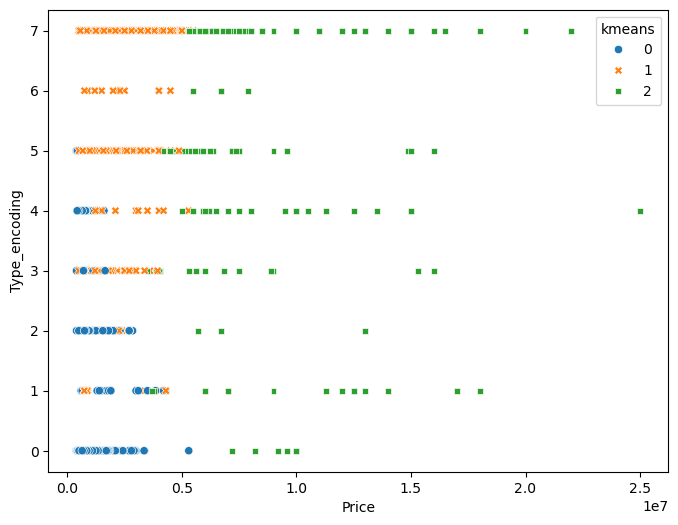

In [660]:

# Convert 'kmeans' to categorical (if it's numerical)
if 'kmeans' in X.columns:
    X['kmeans'] = X['kmeans'].astype(str)

# Create scatter plot with markers
plt.figure(figsize=(8,6))
sns.scatterplot(data=X, x='Price', y='Type_encoding', hue='kmeans', style='kmeans', markers=True)

# Show the plot
plt.show()

In [661]:
#sns.scatterplot(data = X , x = 'Beds', y = 'Baths', hue = 'kmeans')

In [662]:
#sns.scatterplot(data = X , x = 'Baths', y = 'Area m2', hue = 'kmeans')

We See That Cluster 0 shows data with low Prices because the Area m2 is low, representing cheap real estate. This may be caused by different reasons, like which side of Riyadh the real estate is located, the m2 prices, or even the age of the real estate.
Cluster 1 shows data with kind of expected Prices but it also shows that it has low Area m2 with high prices and that may be caused by the location of the real estate and on which side of Riyadh it is.
Cluster 2 data with high Prices and also high Area m2 and based on our data we see that it's mostly land or villas or floors and them having high prices is totally expected based on their types.


In [663]:
X[X['kmeans'] == '0']

,Type_encoding,Price,Area m2,kmeans
16,0,690000.0,159,0
37,0,795000.0,158,0
77,0,980000.0,251,0
78,0,605000.0,167,0
79,0,545000.0,119,0
...,...,...,...,...
17390,0,730000.0,176,0
17397,0,510000.0,182,0
17408,2,800000.0,176,0
17431,2,750000.0,164,0


## 3D Chart

In [664]:
import plotly.express as px

# Create a temporary copy for plotting (without modifying X)
X_plot = X.copy()

# Ensure kmeans column exists and convert to integer type first (if needed)
if 'kmeans' in X_plot.columns:
    X_plot['kmeans'] = X_plot['kmeans'].astype(int)  # Ensure it's an integer
    X_plot['kmeans_label'] = X_plot['kmeans'].replace({0: 'Avg Price', 1: 'Low Price', 2: 'High price'}).astype(str)  # Replace & Convert to string

# Create 3D scatter plot with updated labels
fig = px.scatter_3d(X_plot, x='Type_encoding', y='Price', z='Area m2',
                    color='kmeans_label', title="3D Cluster Price of df Riyadh")

# Show the plot
fig.show()


In [665]:
# import joblib
# joblib.dump(model, 'Riyadh_KM.joblib')
# joblib.dump(scaler, 'scaler.joblib')

# df_eastern_region df

In [666]:
encoder = LabelEncoder()
df_eastern_region['Type_encoding'] = encoder.fit_transform(df_eastern_region['Type'])  
df_eastern_region['Location_encoding'] = encoder.fit_transform(df_eastern_region['Location'])  
df_eastern_region['Neighborhood_encoding'] = encoder.fit_transform(df_eastern_region['Neighborhood'])  

# 0 apartment          # 0    7830
# 7 villa              # 7    5135
# 5 restendil land     # 5    1467
# 1 building           # 1     170
# 3 land               # 3     136
# 2 floor              # 2    1662
# 6 rest houes         # 6      53
# 4 restendil building # 4      94

In [667]:
df_eastern_region

,Price,Type,Beds,Baths,Area m2,Location,Neighborhood,Type_encoding,Location_encoding,Neighborhood_encoding
0,560000.0,Apartment,7,4,146,"Al Zuhur, Dammam",Al Zuhur,0,85,82
1,610000.0,Apartment,6,4,178,"Al Jamiyin, Dammam",Al Jamiyin,0,34,31
2,770000.0,Apartment,5,4,211,"Al Wahah, Dammam",Al Wahah,0,82,78
3,455000.0,Apartment,4,3,170,"Hajr, Dammam",Hajr,0,94,90
4,820000.0,Apartment,5,3,200,"Al Wahah, Dammam",Al Wahah,0,82,78
...,...,...,...,...,...,...,...,...,...,...
1649,1170000.0,Villa,4,5,375,"Al Aziziyah, Al Jubail",Al Aziziyah,6,11,11
1650,640000.0,Apartment,3,4,200,"Ar Rawdah, Al Jubail",Ar Rawdah,0,86,83
1651,550000.0,Apartment,6,6,211,"Ishbiliyah, Al Jubail",Ishbiliyah,0,97,93
1652,880000.0,Villa,5,5,600,"Al Aziziyah, Al Jubail",Al Aziziyah,6,11,11


## Building the model Kmeans

In [668]:
# Selecting numerical columns for clustering
#X = Bayut_df.drop(columns=['Type','Location','City','Neighborhood'])  

# 0.3/0.4  
F = ['Type_encoding','Price',"Area m2"]
# 0.4/0.59 F = ['Type_encoding','Location_encoding','City_encoding','Neighborhood_encoding']
#F = ['Type_encoding','Location_encoding','City_encoding','Neighborhood_encoding','Price']
X = df_eastern_region[F]

# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



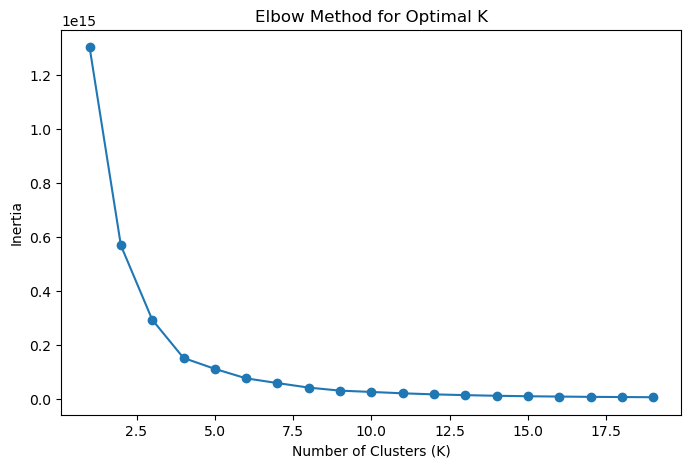

In [669]:
# Finding the optimal number of clusters using the Elbow Method
wcss = []
k_range = range(1, 20)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [670]:
# Optional: Apply k-Means using the optimal number of clusters
optimal_clusters = 3 # This might change based on your actual elbow curve analysis
model = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

## Train and Test the Model

In [671]:
# Fit the model on the training data
y_pred = model.fit_predict(X_scaled)

## Evaluating the Model 

In [672]:
X.head(2)

,Type_encoding,Price,Area m2
0,0,560000.0,146
1,0,610000.0,178


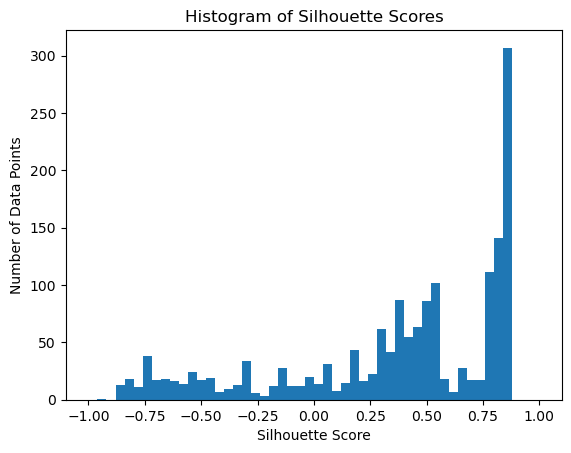

Silhouette average score: 0.35958709952203044


In [673]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Calculate Silhouette scores for each data point
silhouette_scores = silhouette_samples(X, y_pred)

# Calculate Silhouette average score
silhouette_avg = silhouette_score(X, y_pred)

# Plot Silhouette scores
plt.hist(silhouette_scores, bins=50, range=(-1, 1))
plt.title('Histogram of Silhouette Scores')
plt.xlabel('Silhouette Score')
plt.ylabel('Number of Data Points')
plt.show()

print(f'Silhouette average score: {silhouette_avg}')

In [674]:
silhouette_scores

array([ 0.85863719,  0.8504582 ,  0.6425558 , ...,  0.85624925,
       -0.35706557, -0.76294373])

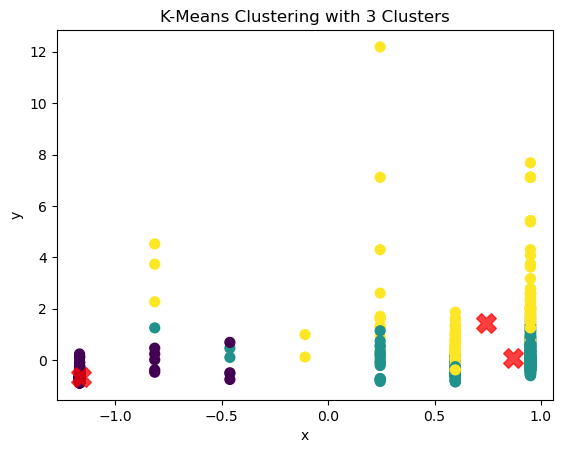

In [675]:
# Plotting the clusters with optimal number
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [676]:
X['kmeans'] = y_pred

/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_7718/353328013.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [677]:
X['kmeans'].value_counts()

kmeans
1    704
0    692
2    258
Name: count, dtype: int64

In [678]:
X[X["kmeans"]==2]["Type_encoding"].value_counts()

Type_encoding
6    135
5    105
4     13
1      3
3      2
Name: count, dtype: int64

In [679]:
X[X["kmeans"]==2].describe().T

,count,mean,std,min,25%,50%,75%,max
Type_encoding,258.0,5.410853e+00,7.901377e-01,1.0,5.0,6.0,6.0,6.0
Price,258.0,2.475572e+06,1.389036e+06,648000.0,1545986.0,2350000.0,2950000.0,12000000.0
Area m2,258.0,6.509651e+02,1.691405e+02,250.0,494.0,667.5,750.0,1000.0
kmeans,258.0,2.000000e+00,0.000000e+00,2.0,2.0,2.0,2.0,2.0


In [680]:
X[X["kmeans"]==1].describe().T

,count,mean,std,min,25%,50%,75%,max
Type_encoding,704.0,5.765625e+00,0.549574,1.0,6.0,6.0,6.0,6.0
Price,704.0,1.273083e+06,431198.868931,437100.0,960000.0,1200000.0,1500000.0,2800000.0
Area m2,704.0,3.692599e+02,108.446626,63.0,294.0,362.5,437.0,685.0
kmeans,704.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0


In [681]:
X[X["kmeans"]==0].describe().T

,count,mean,std,min,25%,50%,75%,max
Type_encoding,692.0,0.021676,0.217454,0.0,0.0,0.0,0.0,4.0
Price,692.0,614069.364162,148641.210181,400000.0,530000.0,590000.0,680000.0,1800000.0
Area m2,692.0,189.241329,44.960550,73.0,163.0,183.0,211.0,599.0
kmeans,692.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [682]:
X[X["kmeans"]==0] ["Price"].mean(), X[X["kmeans"]==1] ["Price"].mean(), X[X["kmeans"]==2] ["Price"].mean()

(614069.3641618497, 1273083.4346590908, 2475571.8372093025)

/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_7718/1812565799.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



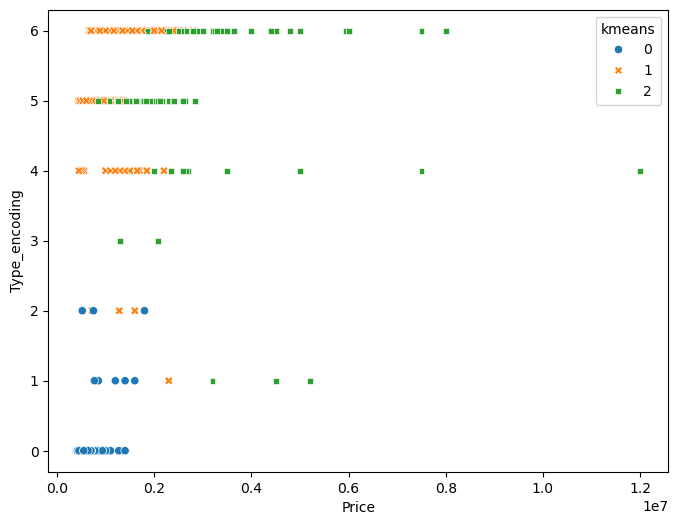

In [683]:

# Convert 'kmeans' to categorical (if it's numerical)
if 'kmeans' in X.columns:
    X['kmeans'] = X['kmeans'].astype(str)

# Create scatter plot with markers
plt.figure(figsize=(8,6))
sns.scatterplot(data=X, x='Price', y='Type_encoding', hue='kmeans', style='kmeans', markers=True)

# Show the plot
plt.show()

In [684]:
#sns.scatterplot(data = X , x = 'Beds', y = 'Baths', hue = 'kmeans')

In [685]:
#sns.scatterplot(data = X , x = 'Baths', y = 'Area m2', hue = 'kmeans')

We See That Cluster 0 shows data with low Prices because the Area m2 is low, representing cheap real estate. This may be caused by different reasons, like which side of Riyadh the real estate is located, the m2 prices, or even the age of the real estate.
Cluster 1 shows data with kind of expected Prices but it also shows that it has low Area m2 with high prices and that may be caused by the location of the real estate and on which side of Riyadh it is.
Cluster 2 data with high Prices and also high Area m2 and based on our data we see that it's mostly land or villas or floors and them having high prices is totally expected based on their types.


## 3d chart

In [686]:
import plotly.express as px

# Create a temporary copy for plotting (without modifying X)
X_plot = X.copy()

# Ensure kmeans column exists and convert to integer type first (if needed)
if 'kmeans' in X_plot.columns:
    X_plot['kmeans'] = X_plot['kmeans'].astype(int)  # Ensure it's an integer
    X_plot['kmeans_label'] = X_plot['kmeans'].replace({0: 'Avg Price', 1: 'Low Price', 2: 'High price'}).astype(str)  # Replace & Convert to string

# Create 3D scatter plot with updated labels
fig = px.scatter_3d(X_plot, x='Type_encoding', y='Price', z='Area m2',
                    color='kmeans_label', title="3D Cluster of Price of df Eastern_region")

# Show the plot
fig.show()


In [687]:
# import joblib
# joblib.dump(model, 'Eastern_KM.joblib')

# df_western_region df

In [688]:
encoder = LabelEncoder()
df_western_region['Type_encoding'] = encoder.fit_transform(df_western_region['Type'])  
df_western_region['Location_encoding'] = encoder.fit_transform(df_western_region['Location'])  
df_western_region['Neighborhood_encoding'] = encoder.fit_transform(df_western_region['Neighborhood'])  

# 0 apartment          # 0    7830
# 7 villa              # 7    5135
# 5 restendil land     # 5    1467
# 1 building           # 1     170
# 3 land               # 3     136
# 2 floor              # 2    1662
# 6 rest houes         # 6      53
# 4 restendil building # 4      94

In [689]:
df_western_region

,Price,Type,Beds,Baths,Area m2,Location,Neighborhood,Type_encoding,Location_encoding,Neighborhood_encoding
0,560000.0,Apartment,2,2,58,"Wadi Jalil, Makkah",Wadi Jalil,0,164,157
1,1354445.0,Residential Land,0,0,934,"As Salamah, Makkah",As Salamah,5,126,120
2,520000.0,Apartment,4,3,127,"Batha Quraysh, Makkah",Batha Quraysh,0,135,128
3,650000.0,Apartment,4,3,184,"Al Mohamdya, Makkah",Al Mohamdya,0,56,52
4,698077.0,Residential Land,0,0,395,"Al Umrah, Makkah",Al Umrah,5,108,102
...,...,...,...,...,...,...,...,...,...,...
5353,650000.0,Apartment,3,2,174,"Al Nuzhah, North Jeddah, Jeddah",Al Nuzhah,0,73,68
5354,1200000.0,Apartment,4,4,262,"Al Marwah, North Jeddah, Jeddah",Al Marwah,0,55,51
5355,840000.0,Apartment,6,4,183,"Al Manar, North Jeddah, Jeddah",Al Manar,0,52,48
5356,590000.0,Apartment,4,2,139,"Al Marwah, North Jeddah, Jeddah",Al Marwah,0,55,51


## Building the model Kmeans

In [690]:
# Selecting numerical columns for clustering
#X = Bayut_df.drop(columns=['Type','Location','City','Neighborhood'])  

# 0.3/0.4  
F = ['Type_encoding','Price',"Area m2"]
# 0.4/0.59 F = ['Type_encoding','Location_encoding','City_encoding','Neighborhood_encoding']
#F = ['Type_encoding','Location_encoding','City_encoding','Neighborhood_encoding','Price']
X = df_western_region[F]

# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



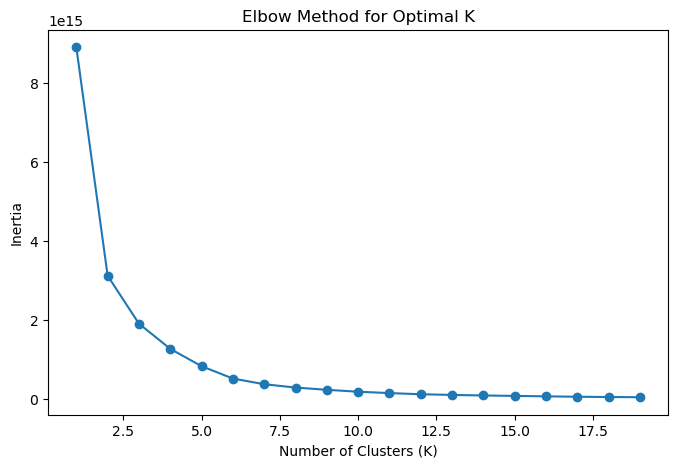

In [691]:
# Finding the optimal number of clusters using the Elbow Method
wcss = []
k_range = range(1, 20)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [692]:
# Optional: Apply k-Means using the optimal number of clusters
optimal_clusters = 3 # This might change based on your actual elbow curve analysis
model = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

## Train and Test the Model

In [693]:
# Fit the model on the training data
y_pred = model.fit_predict(X_scaled)

## Evaluating the Model 

In [694]:
X.head(2)

,Type_encoding,Price,Area m2
0,0,560000.0,58
1,5,1354445.0,934


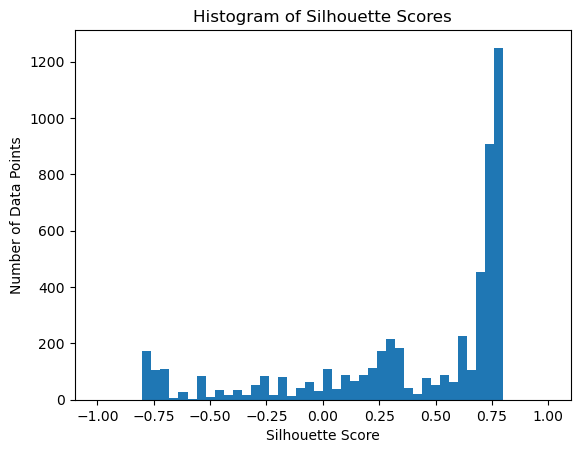

Silhouette average score: 0.39247371683134424


In [695]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Calculate Silhouette scores for each data point
silhouette_scores = silhouette_samples(X, y_pred)

# Calculate Silhouette average score
silhouette_avg = silhouette_score(X, y_pred)

# Plot Silhouette scores
plt.hist(silhouette_scores, bins=50, range=(-1, 1))
plt.title('Histogram of Silhouette Scores')
plt.xlabel('Silhouette Score')
plt.ylabel('Number of Data Points')
plt.show()

print(f'Silhouette average score: {silhouette_avg}')

In [696]:
silhouette_scores

array([0.76156078, 0.19652978, 0.74257155, ..., 0.63598655, 0.77101389,
       0.25188794])

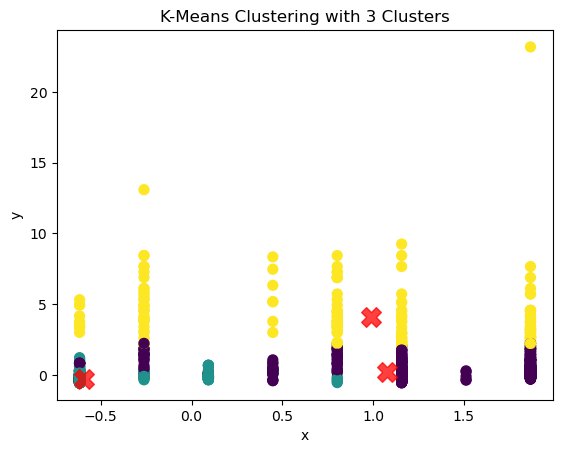

In [697]:
# Plotting the clusters with optimal number
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [698]:
X['kmeans'] = y_pred

/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_7718/353328013.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [699]:
X['kmeans'].value_counts()

kmeans
1    3444
0    1713
2     201
Name: count, dtype: int64

In [700]:
X[X["kmeans"]==2]["Type_encoding"].value_counts()

Type_encoding
7    74
4    43
1    34
5    33
0    10
3     7
Name: count, dtype: int64

In [701]:
X[X["kmeans"]==2].describe().T

,count,mean,std,min,25%,50%,75%,max
Type_encoding,201.0,4.527363e+00,2.362308e+00,0.0,3.0,5.0,7.0,7.0
Price,201.0,6.375953e+06,2.862741e+06,3500000.0,4500000.0,5500000.0,7000000.0,31000000.0
Area m2,201.0,6.377164e+02,2.048448e+02,112.0,546.0,660.0,775.0,978.0
kmeans,201.0,2.000000e+00,0.000000e+00,2.0,2.0,2.0,2.0,2.0


In [702]:
X[X["kmeans"]==1].describe().T

,count,mean,std,min,25%,50%,75%,max
Type_encoding,3444.0,0.070557,0.385571,0.0,0.0,0.0,0.0,4.0
Price,3444.0,720288.863240,245740.274448,400000.0,562250.0,680000.0,790000.0,2700000.0
Area m2,3444.0,168.090592,52.536155,44.0,132.0,161.0,192.0,529.0
kmeans,3444.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [703]:
X[X["kmeans"]==0].describe().T

,count,mean,std,min,25%,50%,75%,max
Type_encoding,1713.0,4.765908e+00,2.866697,0.0,2.0,7.0,7.0,7.0
Price,1713.0,1.358475e+06,706440.766858,400000.0,899999.0,1200000.0,1600000.0,4200000.0
Area m2,1713.0,4.717799e+02,191.950137,86.0,307.0,415.0,640.0,1000.0
kmeans,1713.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0


In [704]:
X[X["kmeans"]==0] ["Price"].mean(), X[X["kmeans"]==1] ["Price"].mean(), X[X["kmeans"]==2] ["Price"].mean()

(1358475.148277875, 720288.8632404181, 6375953.124378109)

/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_7718/1812565799.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



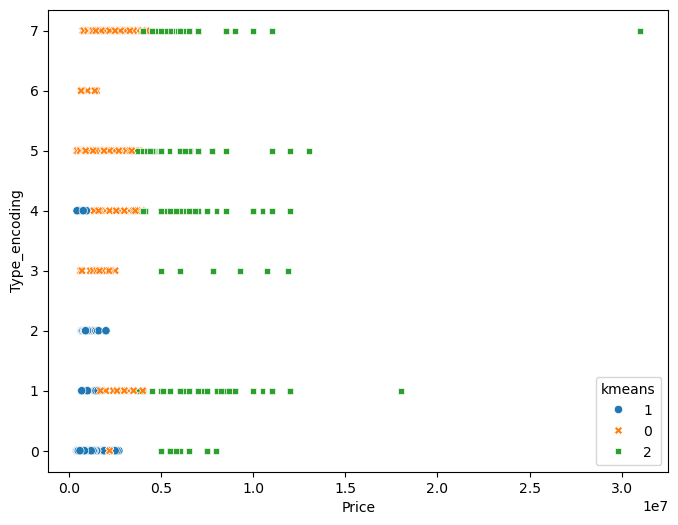

In [705]:

# Convert 'kmeans' to categorical (if it's numerical)
if 'kmeans' in X.columns:
    X['kmeans'] = X['kmeans'].astype(str)

# Create scatter plot with markers
plt.figure(figsize=(8,6))
sns.scatterplot(data=X, x='Price', y='Type_encoding', hue='kmeans', style='kmeans', markers=True)

# Show the plot
plt.show()

In [706]:
#sns.scatterplot(data = X , x = 'Beds', y = 'Baths', hue = 'kmeans')

In [707]:
#sns.scatterplot(data = X , x = 'Baths', y = 'Area m2', hue = 'kmeans')

We See That Cluster 0 shows data with low Prices because the Area m2 is low, representing cheap real estate. This may be caused by different reasons, like which side of Riyadh the real estate is located, the m2 prices, or even the age of the real estate.
Cluster 1 shows data with kind of expected Prices but it also shows that it has low Area m2 with high prices and that may be caused by the location of the real estate and on which side of Riyadh it is.
Cluster 2 data with high Prices and also high Area m2 and based on our data we see that it's mostly land or villas or floors and them having high prices is totally expected based on their types.


## 3D Chart

In [708]:
import plotly.express as px

# Create a temporary copy for plotting (without modifying X)
X_plot = X.copy()

# Ensure kmeans column exists and convert to integer type first (if needed)
if 'kmeans' in X_plot.columns:
    X_plot['kmeans'] = X_plot['kmeans'].astype(int)  # Ensure it's an integer
    X_plot['kmeans_label'] = X_plot['kmeans'].replace({0: 'Avg Price', 1: 'High Price', 2: 'Low Price'}).astype(str)  # Replace & Convert to string

# Create 3D scatter plot with updated labels
fig = px.scatter_3d(X_plot, x='Type_encoding', y='Price', z='Area m2',
                    color='kmeans_label', title="3D Cluster of Price of df western_region")

# Show the plot
fig.show()


In [709]:
# import joblib
# joblib.dump(model, 'Western_KM.joblib')

# df_southern_region df

In [710]:
encoder = LabelEncoder()
df_southern_region['Type_encoding'] = encoder.fit_transform(df_southern_region['Type'])  
df_southern_region['Location_encoding'] = encoder.fit_transform(df_southern_region['Location'])  
df_southern_region['Neighborhood_encoding'] = encoder.fit_transform(df_southern_region['Neighborhood'])  

# 0 apartment          # 0    7830
# 7 villa              # 7    5135
# 5 restendil land     # 5    1467
# 1 building           # 1     170
# 3 land               # 3     136
# 2 floor              # 2    1662
# 6 rest houes         # 6      53
# 4 restendil building # 4      94

In [711]:
df_southern_region

,Price,Type,Beds,Baths,Area m2,Location,Neighborhood,Type_encoding,Location_encoding,Neighborhood_encoding
0,560000.0,Apartment,6,3,202,"Al Muhammadiyah 2, Jazan",Al Muhammadiyah 2,0,26,26
1,550000.0,Apartment,3,2,204,"Al Muhammadiyah 2, Jazan",Al Muhammadiyah 2,0,26,26
2,650000.0,Apartment,5,4,212,"Ar Rehab 1, Jazan",Ar Rehab 1,0,71,66
3,500000.0,Apartment,5,3,197,"Al Muhammadiyah 2, Jazan",Al Muhammadiyah 2,0,26,26
4,550000.0,Apartment,2,2,204,"Al Muhammadiyah 2, Jazan",Al Muhammadiyah 2,0,26,26
...,...,...,...,...,...,...,...,...,...,...
1199,465000.0,Apartment,6,4,202,"Al Maealaa, Ahad Rafidah",Al Maealaa,0,19,19
1200,465000.0,Apartment,6,4,202,"Al Maealaa, Ahad Rafidah",Al Maealaa,0,19,19
1201,1000000.0,Villa,4,3,382,"Al Maealaa, Ahad Rafidah",Al Maealaa,7,19,19
1202,1500000.0,Land,0,0,600,"Al Maealaa, Ahad Rafidah",Al Maealaa,3,19,19


## Building the model Kmeans

In [712]:
# Selecting numerical columns for clustering
#X = Bayut_df.drop(columns=['Type','Location','City','Neighborhood'])  

# 0.3/0.4  
F = ['Type_encoding','Price',"Area m2"]
# 0.4/0.59 F = ['Type_encoding','Location_encoding','City_encoding','Neighborhood_encoding']
#F = ['Type_encoding','Location_encoding','City_encoding','Neighborhood_encoding','Price']
X = df_southern_region[F]

# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



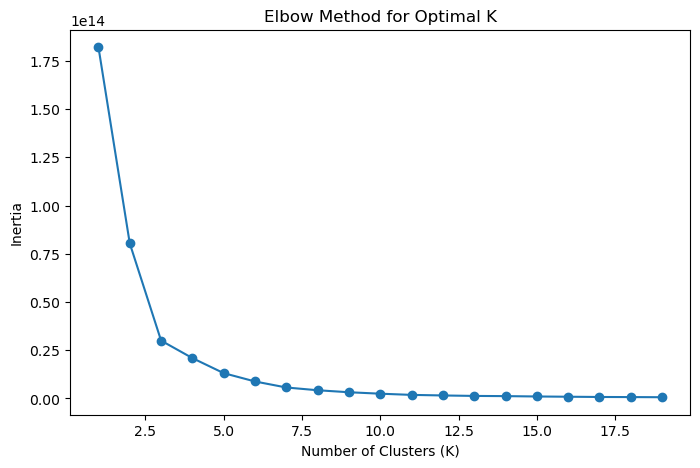

In [713]:
# Finding the optimal number of clusters using the Elbow Method
wcss = []
k_range = range(1, 20)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [714]:
# Optional: Apply k-Means using the optimal number of clusters
optimal_clusters = 3 # This might change based on your actual elbow curve analysis
model = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

## Train and Test the Model

In [715]:
# Fit the model on the training data
y_pred = model.fit_predict(X_scaled)

## Evaluating the Model 

In [716]:
X.head(2)

,Type_encoding,Price,Area m2
0,0,560000.0,202
1,0,550000.0,204


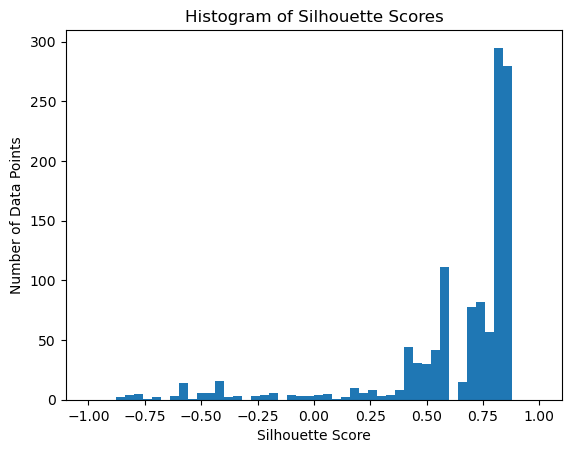

Silhouette average score: 0.628652212162918


In [717]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Calculate Silhouette scores for each data point
silhouette_scores = silhouette_samples(X, y_pred)

# Calculate Silhouette average score
silhouette_avg = silhouette_score(X, y_pred)

# Plot Silhouette scores
plt.hist(silhouette_scores, bins=50, range=(-1, 1))
plt.title('Histogram of Silhouette Scores')
plt.xlabel('Silhouette Score')
plt.ylabel('Number of Data Points')
plt.show()

print(f'Silhouette average score: {silhouette_avg}')

In [718]:
silhouette_scores

array([0.83779973, 0.84482465, 0.71834042, ..., 0.49329487, 0.48307108,
       0.84059283])

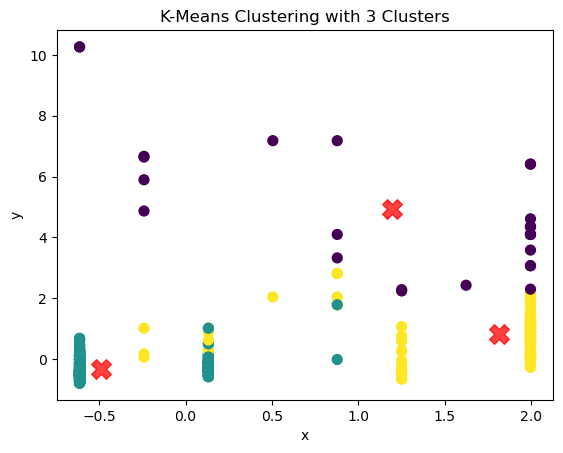

In [719]:
# Plotting the clusters with optimal number
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [720]:
X['kmeans'] = y_pred

/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_7718/353328013.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [721]:
X['kmeans'].value_counts()

kmeans
1    942
2    236
0     26
Name: count, dtype: int64

In [722]:
X[X["kmeans"]==2]["Type_encoding"].value_counts()

Type_encoding
7    205
5     13
2      6
4      5
1      3
0      3
3      1
Name: count, dtype: int64

In [723]:
X[X["kmeans"]==2].describe().T

,count,mean,std,min,25%,50%,75%,max
Type_encoding,236.0,6.516949e+00,1.403540,0.0,7.0,7.0,7.0,7.0
Price,236.0,1.031642e+06,264909.151998,450000.0,800000.0,1050000.0,1200000.0,1800000.0
Area m2,236.0,3.911186e+02,111.764773,200.0,310.0,371.5,440.0,990.0
kmeans,236.0,2.000000e+00,0.000000,2.0,2.0,2.0,2.0,2.0


In [724]:
X[X["kmeans"]==1].describe().T

,count,mean,std,min,25%,50%,75%,max
Type_encoding,942.0,0.33758,0.760788,0.0,0.0,0.0,0.00,4.0
Price,942.0,574459.92569,104965.202471,400000.0,500000.0,550000.0,630000.00,1400000.0
Area m2,942.0,221.04034,50.500013,112.0,197.0,210.5,227.75,429.0
kmeans,942.0,1.00000,0.000000,1.0,1.0,1.0,1.00,1.0


In [725]:
X[X["kmeans"]==0].describe().T

,count,mean,std,min,25%,50%,75%,max
Type_encoding,26.0,4.846154e+00,2.633512,0.0,3.25,6.5,7.0,7.0
Price,26.0,2.623489e+06,855891.443414,1577000.0,2025000.00,2400000.0,3200000.0,4700000.0
Area m2,26.0,5.251923e+02,198.758953,155.0,450.00,499.0,700.5,838.0
kmeans,26.0,0.000000e+00,0.000000,0.0,0.00,0.0,0.0,0.0


In [726]:
X[X["kmeans"]==0] ["Price"].mean(), X[X["kmeans"]==1] ["Price"].mean(), X[X["kmeans"]==2] ["Price"].mean()

(2623489.423076923, 574459.9256900212, 1031642.3644067796)

/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_7718/1812565799.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



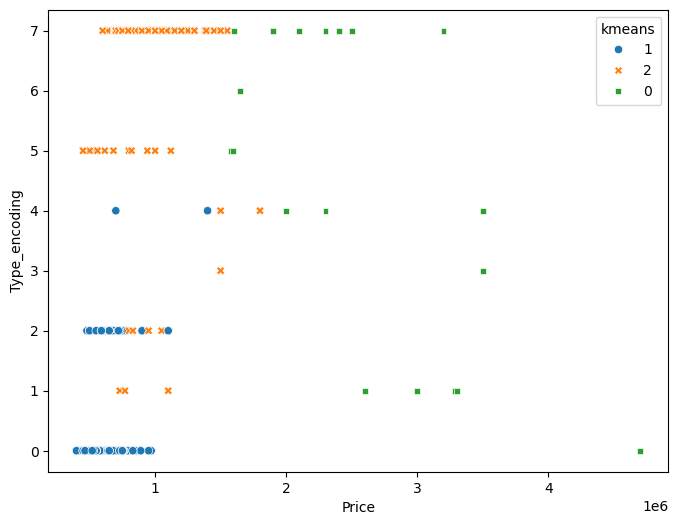

In [727]:

# Convert 'kmeans' to categorical (if it's numerical)
if 'kmeans' in X.columns:
    X['kmeans'] = X['kmeans'].astype(str)

# Create scatter plot with markers
plt.figure(figsize=(8,6))
sns.scatterplot(data=X, x='Price', y='Type_encoding', hue='kmeans', style='kmeans', markers=True)

# Show the plot
plt.show()

In [728]:
#sns.scatterplot(data = X , x = 'Beds', y = 'Baths', hue = 'kmeans')

In [729]:
#sns.scatterplot(data = X , x = 'Baths', y = 'Area m2', hue = 'kmeans')

We See That Cluster 0 shows data with low Prices because the Area m2 is low, representing cheap real estate. This may be caused by different reasons, like which side of Riyadh the real estate is located, the m2 prices, or even the age of the real estate.
Cluster 1 shows data with kind of expected Prices but it also shows that it has low Area m2 with high prices and that may be caused by the location of the real estate and on which side of Riyadh it is.
Cluster 2 data with high Prices and also high Area m2 and based on our data we see that it's mostly land or villas or floors and them having high prices is totally expected based on their types.


In [730]:
import plotly.express as px

# Create a temporary copy for plotting (without modifying X)
X_plot = X.copy()

# Ensure kmeans column exists and convert to integer type first (if needed)
if 'kmeans' in X_plot.columns:
    X_plot['kmeans'] = X_plot['kmeans'].astype(int)  # Ensure it's an integer
    X_plot['kmeans_label'] = X_plot['kmeans'].replace({0: 'Low Price', 1: 'Avg Price', 2: 'High Price'}).astype(str)  # Replace & Convert to string

# Create 3D scatter plot with updated labels
fig = px.scatter_3d(X_plot, x='Type_encoding', y='Price', z='Area m2',
                    color='kmeans_label', title="3D Cluster of Price of df southern_region")

# Show the plot
fig.show()


In [731]:
# import joblib
# joblib.dump(model, 'Southern_KM.joblib')

## DBSCAN

In [732]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

%matplotlib inline

In [733]:
X

,Type_encoding,Price,Area m2,kmeans
0,0,560000.0,202,1
1,0,550000.0,204,1
2,0,650000.0,212,1
3,0,500000.0,197,1
4,0,550000.0,204,1
...,...,...,...,...
1199,0,465000.0,202,1
1200,0,465000.0,202,1
1201,7,1000000.0,382,2
1202,3,1500000.0,600,2


In [734]:
#X.drop(columns=['kmeans'], inplace=True)

### Buliding the Model

In [735]:
min_samples = 4

In [736]:
nn = NearestNeighbors(n_neighbors=min_samples)
nn.fit(X_scaled)
distances, indices = nn.kneighbors(X_scaled)

In [737]:
distances

array([[0.        , 0.        , 0.        , 0.02571419],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       ...,
       [0.        , 0.        , 0.        , 0.13154504],
       [0.        , 1.27047955, 1.34810375, 1.46261109],
       [0.        , 0.        , 0.01879215, 0.02571419]])

In [738]:
distances[:,min_samples-1]

array([0.02571419, 0.        , 0.        , ..., 0.13154504, 1.46261109,
       0.02571419])

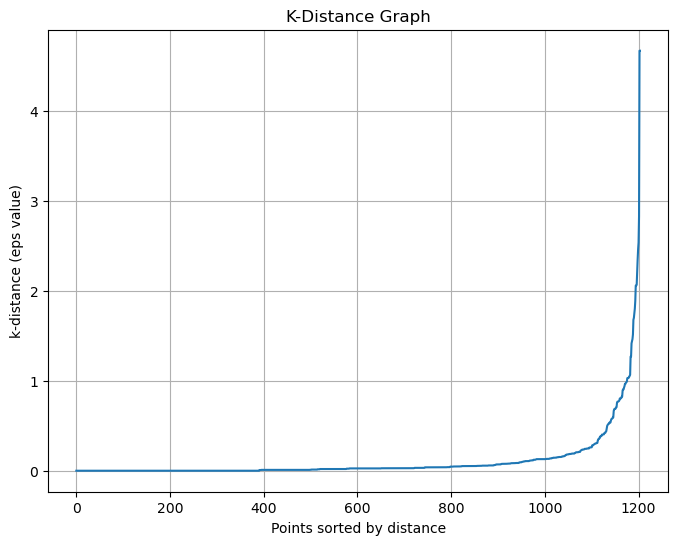

In [739]:
# The distance to the furthest neighbor (min_samples-th nearest) for each point
k_dist = distances[:, min_samples-1]

# Sort distances
k_dist_sorted = np.sort(k_dist)

# 3. Plotting the k-distance graph
plt.figure(figsize=(8, 6))
plt.plot(k_dist_sorted)
plt.title('K-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('k-distance (eps value)')
plt.grid(True)
plt.show()

In [740]:
# 4. Apply DBSCAN with chosen eps and min_samples
# Typically, you choose eps at the "elbow" point in this plot, where the slope changes significantly
chosen_eps = 0.4  # This is an example; choose this value based on the plot
dbscan = DBSCAN(eps=chosen_eps, min_samples=min_samples)

In [741]:
# Fit the model on the training data

clusters = dbscan.fit_predict(X_scaled)

In [742]:
silhouette_avg = silhouette_score(X, clusters)
silhouette_avg

-0.14077229897966206

In [743]:
X.head(2)

,Type_encoding,Price,Area m2,kmeans
0,0,560000.0,202,1
1,0,550000.0,204,1


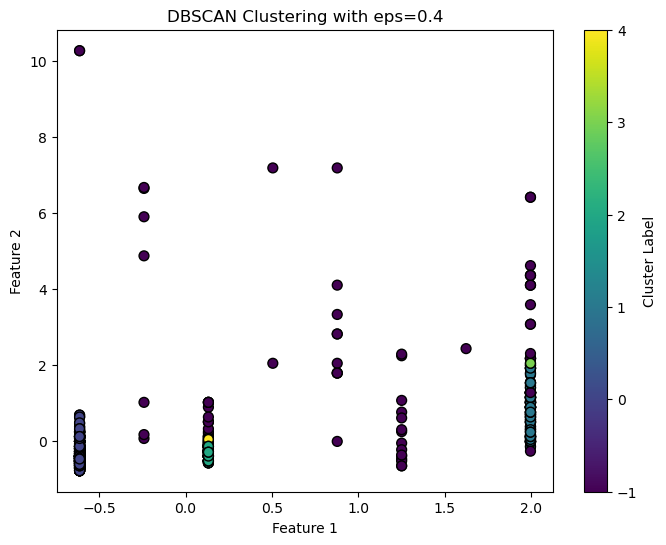

In [744]:
# 5. Plot the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50, edgecolor='k')
plt.title(f'DBSCAN Clustering with eps={chosen_eps}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [745]:
X['dbscan'] = clusters

In [746]:
X['dbscan'].value_counts().sort_values(ascending=  False)

dbscan
 0    785
 1    188
 2    144
-1     74
 3      8
 4      5
Name: count, dtype: int64

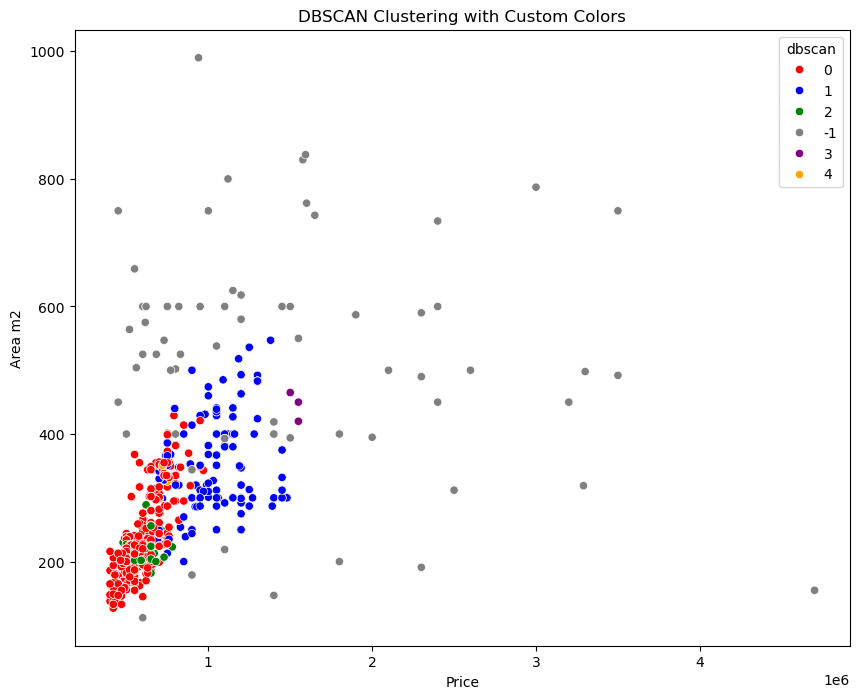

In [747]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom colors for DBSCAN clusters
custom_palette = {
    "-1": "gray",   # Outliers
     "0": "red",
     "1": "blue",
     "2": "green",
     "3": "purple",
     "4": "orange"
}

# Convert dbscan labels to STRING to match the palette dictionary
X['dbscan'] = X['dbscan'].astype(str)

# Plot scatter plot with custom colors
plt.figure(figsize=(10, 8))
sns.scatterplot(data=X, x='Price', y='Area m2', hue='dbscan', palette=custom_palette)
plt.title("DBSCAN Clustering with Custom Colors")
plt.show()


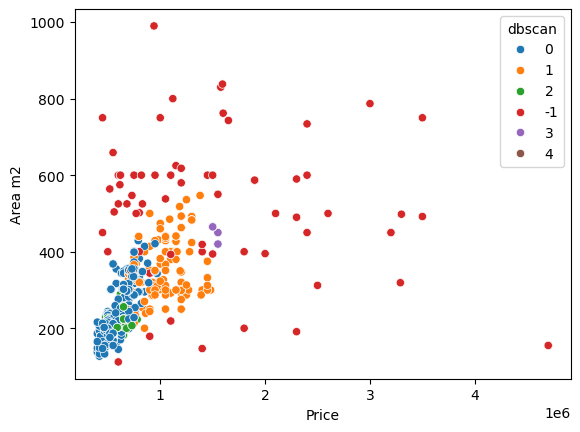

In [748]:
sns.scatterplot(data = X , x = 'Price', y = 'Area m2', hue = 'dbscan')
plt.show()